Nesta prática iremos apresentar o uso de embeddings. Para isso, você deve primeiro instalar as dependencias usando `pip install -r requirements.txt` (ou `pip3`, dependendo da forma que seu python está instalado).

In [1]:
!pip3 install -r requirements.txt

You should consider upgrading via the '/home/diego/MMC/oficinas-4.0/segundo-semestre/venv/bin/python -m pip install --upgrade pip' command.


Inicialmente, você deverá baixar os repositorios em português e inglês e salvá-los na pasta `embeddings_data` seguindo as seguintes instruções: 

- [No respositório da USP](http://www.nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc) baixe [este arquivo (Glove 100 dimensões)](http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s100.zip). Ele possui  um pouco mais de 600 mil palavras retiradas de textos de páginas Web tais como a Wikipedia e canais de notícias [(Hartmann et al., 2017)](https://arxiv.org/abs/1708.06025). Descomprima e renomeie o arquivo txt para `glove.pt.100.txt`.

**Para baixar o repositório da USP e salvar o arquivo com o nome** `glove.pt.100.txt` **execute a célula abaixo:**

In [2]:
# downloading file
import urllib.request
import os

if not os.path.exists('embeddings_data/glove.pt.100.txt'):
    url = 'http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s100.zip'
    urllib.request.urlretrieve(url, 'embeddings_data/glove_s100.zip')

    # opening txt file from zipfile, reading its lines and writing
    # its contents to embeddings_data/glove.pt.100.txt
    from zipfile import ZipFile
    myzip = ZipFile('embeddings_data/glove_s100.zip', 'r')
    conteudo = [
        line.decode('utf-8') for line in myzip.open('glove_s100.txt', 'r').readlines()
    ]
    file = open('embeddings_data/glove.pt.100.txt', 'w')
    file.writelines(conteudo)

    # closing files
    file.close()
    myzip.close()

    # delete zip file (to release Hardrive space)
    os.remove('embeddings_data/glove_s100.zip')

    # releasing memory
    del(conteudo)

- No [repositório de Stanford](https://nlp.stanford.edu/projects/glove/), baixe [este arquivo](http://nlp.stanford.edu/data/glove.6B.zip) use o arquivo . Este arquivo compreende ~400 mil palavras de textos extraidos da Wikipédia e [GigaWord](https://catalog.ldc.upenn.edu/LDC2011T07) [(Pennington et al., 2015)](https://nlp.stanford.edu/pubs/glove.pdf). Descomprima e salve o arquivo com embeddings de 100 dimensões (nome `glove.6B.100d.txt`) na pasta `embedding_data` renomeando esse arquivo para `glove.en.100.txt`.

**Para baixar o repositório de Stanford e salvar o arquivo com o nome** `glove.en.100.txt` **execute a célula abaixo:**

In [3]:
# downloading file
import urllib.request
import os

if not os.path.exists('embeddings_data/glove.en.100.txt'):
    url = 'http://nlp.stanford.edu/data/glove.6B.zip'
    urllib.request.urlretrieve(url, 'embeddings_data/glove.6B.zip')

    # opening txt file from zipfile, reading its lines and writing
    # its contents to embeddings_data/glove.pt.100.txt
    from zipfile import ZipFile
    myzip = ZipFile('embeddings_data/glove.6B.zip', 'r')
    conteudo = [
        line.decode('utf-8') for line in myzip.open('glove.6B.100d.txt', 'r').readlines()
    ]
    file = open('embeddings_data/glove.en.100.txt', 'w')
    file.writelines(conteudo)

    # closing files
    file.close()
    myzip.close()

    # delete zip file (to release Hardrive space)
    os.remove('embeddings_data/glove.6B.zip')

    # releasing memory
    del(conteudo)

Como você pode perceber, esta prática demandará um espaço livre em disco de aproximadamente 3GB. Os arquivos estão no seguinte formato: em cada linha, uma palavra e N valores representando o valor em cada uma das N dimensões do embedding desta palavra. Por exemplo, caso as palavras `casa`, `redondel` e `rei` sejam representadas por um embedding de 4 dimensões, uma possível representação seria:

```
casa 0.12 0.1 0.5 -0.4
redondel 0.2 0.1 -0.4 0.5
rei 0.1 0.5 -0.1 0.1
```

A função `get_embedding`, do arquivo `embeddings/utils.py` é responsável por ler esse arquivo e gerar um dicionário em que a chave é a palavra e o valor é sua representação por meio de embeddings. Para a  representação acima, a saída desta função seria seria: 

In [4]:
import numpy as np
dict_embedding_ex = {
                        "casa":np.array([0.12,0.1,0.5,-0.4]),
                        "redondel":np.array([0.2,0.1,-0.4,0.5]),
                        "rei":np.array([0.1,0.5,-0.1,0.1]),
                    }

Nessa função, também é salvo o objeto criado usando [pickle](https://docs.python.org/3/library/pickle.html), assim, a próxima vez que seja lido o embedding, a leitura será mais rápida.


**Atividade 1 - obtenção do embedding**: Complete a função `get_embedding` obtendo a palavra e o vetor de embeddings com a dimensão `embeddings_size` substituindo os `None` apropriadamente. O dataset possui algumas incosistencias que você deve considerar ao modificar essas linhas: no dataset em português, a maioria das palavras compostas são separadas por hífen, porém, foi verificado que umas palavras foi separado por espaço. Por caso disso, você deve considerar que as `embeddings_size` últimas posições são os valores de cada dimensão, separados por espaço e, as demais, são a palavra. Sugiro "brincar" abaixo com o uso de [índice negativo](https://www.geeksforgeeks.org/python-negative-index-of-element-in-list/) entenda também o [método join](https://www.geeksforgeeks.org/join-function-python/).

In [5]:
import numpy as np
linha = "pé de moleque 0.1 -0.5 0.5 0.1 -0.5"
embedding_size = 5
arr_line = linha.strip().split()

word = " ".join(arr_line[0:-embedding_size])
#colocamos float16 para economizar memória
embedding = np.array(arr_line[-embedding_size:], dtype=np.float16)
print(f"'{word}': {embedding}")

'pé de moleque': [ 0.1 -0.5  0.5  0.1 -0.5]


Execute o teste unitário abaixo para verificar o funcionamento do `get_embeddings`

In [6]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_get_embeddings

0: rei
Palavras ignoradas: 0
.
----------------------------------------------------------------------
Ran 1 test in 0.062s

OK


Execute os embeddings em português e ingles. Não se preocupe com as palavras ignoradas: foram algumas inconsistencias no dataset.

In [2]:
import sys
from embeddings.utils import get_embedding, plot_words_embeddings

str_dataset = "glove.en.100.txt"
dict_embedding_en = get_embedding(str_dataset)
str_dataset = "glove.pt.100.txt"
dict_embedding_pt = get_embedding(str_dataset)

0: the
LInha com erro: 'port -0.94451 -0.41918 0.16819 -0.67172 -0.061914 -0.47964 -0.5344 0.45761 0.59723 0.51453 -0.31172 -0.44673 -0.041649 -0.098756 -0.19791 -1.4892 0.82108 -0.72552 -0.32739 0.46094 0.66842 -0.19532 0.34386 -0.50672 0.30778 -0.30816 -0.73175 -0.31235 0.19399 0.13519 -0.53491 -0.21284 0.47458 0.040454 0.38752 -0.049032 0.06913 0.46416 0.055362 -0.12081 0.055125 -1.7246 0.3235 -0.35086 0.90604 1.0472 -0.029213 -0.60464 0.79627 1.1108 0.28675 0.68702 0.40203 0.64777 -0.55304 -1.5814 -1.4324 -1.3822 1.7227 -0.15305 -0.79066 -0.24519 -0.66218 -0.38436 -0.55682 0.12663 -0.59544 0.046581 -0.3353 0.12981 -0.7238 -0.107 0.27073 -0.60108 0.36972 -0.046519 0.8031 0.3818 -0.8024 0.6256 0.44167 0.088033 -0.78446 1.1189 -0.74748 0.5858 0.30813 -0.39637 0.34147 -0.60128 0.56194 0.27767 -0.51396 -0.0075831 -0.044894 0.94605 -0.54196 -0.0074126 0.89228 0.082159
'
Palavras ignoradas: 1
LInha com erro: 'afeta -0.536855 -0.007495 -0.013442 0.010075 -0.431695 -0.954242 -0.568022 0.298

O `plot_words_embeddings` utiliza [Análise de Componentes Principais](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) (PCA, do inglês Principal Component Analisys) para reduzir cada embedding em 2 dimensões para, logo após, plotar em um grafico a posição dessas palavras de acordo com o embedding. Veja o grafico apresentado abaixo. 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



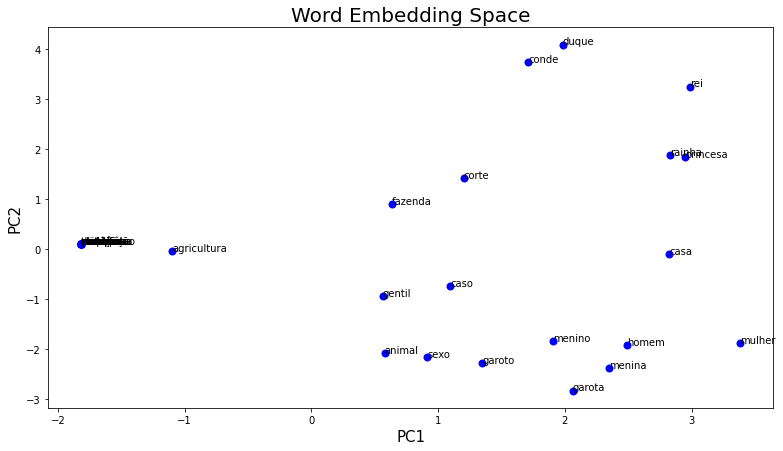

In [3]:
embeddings_to_use = {
                        "en":
                            {"embedding":dict_embedding_en,
                            "words_to_use":["prince","princess",
                                            "duchess", "duke", "countess", "marquis", 
                                            "marquise","king","queen",
                                            "girl","boy","man","woman","child"]},

                        "pt":{"embedding":dict_embedding_pt,
                          "words_to_use":["principe","rei","rainha","trator","agricultura","construção", "conde","duquesa","duque","condessa",
                           "marquês","marquesa","pecuária","fazenda","residência","casa","caso","elucidado",
                           "homem","mulher","princesa","menina","menino","criança","animal","mamífero","cortês","gentil",
                           "garoto","garota", "pedreiro", "pedreira", "prostituta", "cortesã", "plebe", "corte", "sexo"]}
                }

language = "pt"#mude de 'pt' para 'en' para ver em ingles tb!
plot_words_embeddings(embeddings_to_use[language]["embedding"], 
                    embeddings_to_use[language]["words_to_use"])

No exemplo acima, em português, veja que podemos pensar em dois conceitos claramente divididos: a realeza e o gênero. Pense, neste plano cartesiano: qual eixo corresponde ao conceito de realeza? E o de gênero? Perceba que "criança" deveria ter genero neutro - de fato, está mais próximo do zero. Porém, pode haver algum ruído associando a palavra criança ao genero feminino. Isso, em português, pode haver uma explicação, pois utilizamos  o artigo `a`, usado para palavras que remetem ao genero feminino, para se referir a criança. Assim, em português, os artigos podem aproximar uma palavra de genero neutro a um determinado genero.


Em inglês, não foi possível verificar tão bem a divisão entre os conceitos de `genero` e `realeza`. Isso pode ocorrer devido a redução de dimensionalidade: os conceitos não necessariamente correspondem a um eixo no plano cartesiano e, mesmo se corresponder, ao mapear itens com $n$ dimensões para um plano bidimensional, pode haver perda de informação. Mesmo assim, conseguimos ver a separação entre palavras da realeza e que não são da realeza. 

Sinta-se livre para "brincar", alterando/adicionando palavras. Por exemplo, adicione animais. Devido à ambiguidades, ao dataset e à própria redução de dimensionalidade, podem existir palavras que estão erroneamente próximas, se considerarmos o conceito das mesmas,  principalmente se adicionarmos palavras de conceitos muito distintos. Um detalhe: no dataset em português, há uso de palavras compostas e elas estão (geralmente) separadas por hífen. No dataset em inglês não há palavras compostas.

Tanto nesta tarefa quanto na próxima você poderá perceber que os embeddings podem carregar preconceitos. Há uma forma de modificar os vetores para eliminar um determinado tipo de preconceito. Por exemplo, nesses embeddings existirão palavras erronemente similares a um determinado genero e, para corrigir, é possível deixar todas as palavras sem distinção pelo genero. Caso queira saber como minimizar esse problema, veja o artigo "[Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings](https://arxiv.org/abs/1607.06520)". O título do artigo se remete a um preconceito descoberto ao usar analogias, que será o próximo tópico desta prática. 

## Criação de analogias

Outra caracteristica muito interessante ao usar embedding é a criação de analogias. Por exemplo, na frase `homem está para mulher assim como rei está para...`, fazendo operações com os _embeddings_, muitas vezes é possível chegar na analogia mais provável que, neste caso, seria a palavra `rainha`.



**Atividade 2 - calculo da analogia: ** Nesta atividade, iremos implementar o método `calcula_embedding_analogia` da classe `Analogy`. Essa classe tem acesso ao dicionário de embeddings e a estrutura KDTree, que iremos explicá-la posteriormente. Considerando a frase <span style="color:blue">"**palavra_x** está para **palavra_y** assim como **assim_como** esta para **palavra_z**"</span>, o método `calcula_embedding_analogia` recebe como parametro as palavras `palavra_x`, `esta_para` e `assim_ como` e retorna um embedding que, possivelmente, será muito próximo da `palavra_z`. 

Veja [na aula](https://docs.google.com/presentation/d/1-CggYUA2s7LW7_LcnGv7vlpUGFg9kEWG0j6lWGUnaLI/edit?usp=sharing) como é feito o calculo e, logo após, faça o teste unitário:

In [9]:
import numpy as np

A = np.array([[1, 2, 3],[-1.2, 3.2, 1.2],[12.2, 31.2, 11.2]], dtype=np.float16)
B = np.array([[-3, 0, 1],[11, 56, 32.2],[0, 0.2, 0.4]], dtype=np.float16)
C = np.array([[2, 1, 1],[0.1,0.3,0],[1.23, 0.1, 1.2]], dtype=np.float16)

for i,A_val in enumerate(A):
    D = B[i]-A[i]+C[i]
    print("[",end=" ")
    for val in D:
        print(float(val),end=", ")
    print("]")

[ -2.0, -1.0, -1.0, ]
[ 12.3046875, 53.125, 30.984375, ]
[ -10.96875, -30.90625, -9.6015625, ]


In [10]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_calculo_analogia

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


**Atividade 3 - busca da palavra mais similar:** O calculo da atividade anterior resultou em um embedding e, agora, precisamos  procuramos a palavra mais próxima a este embedding obtido. Para isso, precisamos de: (1) uma forma eficiente para percorrer os embeddings para descobrir o mais similar; (2) uma métrica de similaridade/distancia; 

**Como percorrer embeddings?** Para encontrarmos os embeddings similares, uma alternativa seria percorrer todos os vetores de embeddings e encontrar o mais similar. Porém, como estamos trabalhando com centenas de milhares de embeddings, essa operação seria muito custosa. Para isso, podemos usar uma estrutura de dados chamada **KDTree**. KDtree é uma arvore que organiza dados espaciais de tal forma que conseguimos alcançar elementos similares de forma mais eficiente. Caso esteja interessado em mais detalhes, [veja este video](https://www.youtube.com/watch?v=Glp7THUpGow).

**Qual métrica de distancia/similaridade usaremos?**  Já foi demonstrado que esta métrica é eficiente para similaridade entre embeddings é a distancia euclidiana [(Pennington et al., 2015)](https://nlp.stanford.edu/pubs/glove.pdf). A [distancia euclidiana](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana) entre dois pontos $p$ e $q$ é calculada por meio do tamanho da linha entre esses pontos. Para um espaço bidimensional, considerando que os pontos $p$ e $q$ são representados pelas coordenadas $(p_1,p_2)$ e $(q_1,q_2)$, respectivamente, a equação é dada pela seguinte fórmula: $d(p,q) = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2}$ veja uma representação gráfica: 

<img width="400px" src="img/distancia_euclidiana.svg">

Esta métrica pode ser generalizada para um espaço n-dimensional e o cálculo seria: $d(p,q) = \sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...+(p_n-q_n)^n}$. 

Assim, nesta atividade iremos utilizar [a implementação do kdtree do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html). Nessa estrutura, é possível armazenar os embeddings e, logo após fazer consultas eficiente para, por exemplo, procurar os k elementos mais próximos. Veja o exemplo abaixo: 

In [11]:
from sklearn.neighbors import KDTree
elementos = [
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 4],
    [5, 5],
    [6, 6]
]
#os elementos são passados como parametro na construção do KDTree junto com a métrica 
#de distancia que iremos usar
kdtree = KDTree(elementos,  metric='euclidean')

#retorna os k elementos mais próximos e sua distancia
#como podemos fazer uma consulta por lista de pontos, temos que 
#passar uma lista de pontos como parametro
ponto = [3,2]
distancia,pos_mais_prox = kdtree.query([ponto], k=3, return_distance=True)
for i,pos in enumerate(pos_mais_prox[0]):
    elemento = elementos[pos]
    distancia_ponto = distancia[0][i]
    print(f"O ponto {elemento} é o {i+1}º ponto mais próximo de {ponto} distância: {distancia_ponto}")

O ponto [3, 3] é o 1º ponto mais próximo de [3, 2] distância: 1.0
O ponto [2, 2] é o 2º ponto mais próximo de [3, 2] distância: 1.0
O ponto [1, 1] é o 3º ponto mais próximo de [3, 2] distância: 2.23606797749979


Dessa forma, cada embedding pode ser armazenado no KTree para, logo após, obtermos os embeddings mais próximos a um embedding em questão. Não é possível armazenar na estrutura do KDTree a palavra referente a cada embedding representado, por isso, armazenamos essa estrutura como um atributo da classe `KDTreeEmbedding` (arquivo `utils.py`) que armazena também os atributos `pos_to_word` mapeando, para cada posição a palavra correspondente e o atributo `word_to_pos` que faz o oposto: mapeia, para cada palavra, a posição correspondente. Veja no construtor de `KDTreeEmbedding`  como é criado o KDTree. Nela, também será salvo um arquivo com a implementação do KDtree e os atributos `pot_to_word` e `word_to_pos` isso é necessário pois a criação da KDTree é muito custosa.


Nesta atividade, você deverá implementar `get_most_similar_embedding` que obtém as $k$ palavras mais similares à palavra (ou embedding) representado pelo parametro `query` por meio do método `query` da KDTree. O parâmetro `query` pode ser a palavra (`string`) ou o proprio embedding (`np.array`). Logo após, implemente também o método `get_embeddings_by_similarity` que utiliza o método `query_radius` ([veja documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree.query_radius)) que retorna todas as palavras que estão em um raio de `max_distance` da palavra alvo especificada pelo parametro `query`. Para ambas as implementações, utiliza-se o método `positions_to_word`, já implementado, para retornar as palavras de acordo com as posições indicadas. Caso haja alguma palavra a ser ignorada em `words_to_ignore` ela será excluída também no método `positions_to_word`. 

In [12]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_get_most_similar_embedding

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [13]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_embeddings_by_similarity

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


Agora, você pode testar os métodos utilizando os datasets de embeddings. Lembre-se  que o KDTree pode demorar mais de 30 minutos para ser criado na primeira execução de cada idioma. Caso queira testar para o ingles, não esqueça de mudar de `"kdtree.pt.p"` para `"kdtree.en.p"`.

In [14]:
from embeddings.utils import get_embedding, KDTreeEmbedding
str_dataset = "glove.pt.100.txt"
kdtree_file = "kdtree.pt.p"
dict_embedding = get_embedding(str_dataset)
kdtree = KDTreeEmbedding(dict_embedding, kdtree_file)
kdtree.get_most_similar_embedding("carro")

10000: distribuída
20000: diferenciados
30000: socialite
40000: bárbaras
50000: seguro-desemprego
60000: interligada
70000: landi
80000: hurts
90000: jackeline
100000: cataluña
110000: héber
120000: calama
130000: afogue
140000: natalícios
150000: amostrada
160000: portageiros
170000: ozias
180000: banerjee
190000: crackdown
200000: kirchspielslandgemeinde
210000: yello
220000: picrodendraceae
230000: rochlitz
240000: illis
250000: oitis
260000: kalki
270000: autorizagäo
280000: goleminov
290000: mamita
300000: interessarmos
310000: cprp
320000: samitier
330000: dimitre
340000: montegranaro
350000: sanguineti
360000: wurmser
370000: villaronga
380000: zimbra
390000: salvini-plawen
400000: pankisi
410000: hi-c
420000: boggio
430000: super-pena
440000: imecc
450000: adamascados
460000: nikolaeva
470000: chi0
480000: neuropatológicas
490000: atulmente
500000: megainvestigação
510000: analista-tributário
520000: gitirana
530000: quidação
540000: baios
550000: jefa
560000: tae-hyun
570000: 

([0.0,
  3.8529124618382,
  3.879822890301186,
  4.110205347652384,
  4.330550049048636],
 ['carro', 'veículo', 'caminhão', 'motorista', 'moto'])

**Atividade 5 - 💞 apresentando as analogias 💞:** Agora você deverá implementar o método `analogia` da classe `Analogy` que deverá utilizar os métodos `calcula_embedding_analogia` e o `get_most_similar_embedding` para retornar as 4 palavras mais prováveis para completar uma determinada analogia, com os parametros indicados. Caso, dentre as 4 palavras, haja uma palavra dos parametros de entrada, a mesma pode ser excluída, retorando menos palavras. Por exemplo, considerando "**rei** está para **rainha** assim como **homem** está para..." uma caso uma das palavras de saída para essaa entrada  seja `rainha`, o método poderá retornar 3 palavras (eliminando a palavra rainha). Isso já é considerado no método `get_most_similar_embedding`. Lembre-se que o método `get_most_similar_embedding` é da classe KDTreeEmbedding e a `Analogy`possui o atributo `kdtree_embedding` que é uma instancia da classe `KDTreeEmbedding`.

In [15]:
!python3 -m embeddings.embedding_tests TestEmbeddings.test_analogy

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


Veja as analogias (brinque a vontantade com a representação em português e em inglês).

In [16]:
from embeddings.utils import *
dict_embedding = get_embedding( "glove.pt.100.txt",100)
obj_analogy = Analogy(dict_embedding,"kdtree.pt.p")


dict_analogias = {("brasil","brasilia"):["peru","gana","japão","espanha","india"],
                  ("bahia","salvador"):["acre","alagoas","amapá","amazonas","ceará","goiás"],
                  ("brasil","feijoada"):["italia","estados-unidos","inglaterra","argentina","peru"],
                  ("homem","mulher"):["garoto","rei","príncipe","pai","cavalo","garçon"],
                  ("grande","pequeno"):["cheio","alto","forte","largo"],
                  ("pelé","futebol"):["tyson","bolt","senna"],
                  ("atena","sabedoria"):["afrodite","poseidon","zeus","atena"],
                  ("cruzeiro","raposa"):["atlético","gremio","palmeiras","corinthians"],
                 }

for (palavra,esta_para), arr_assim_como in dict_analogias.items():
    print(f"{palavra} está para {esta_para} assim como...")
    for assim_como in arr_assim_como:
        palavras = obj_analogy.analogia(palavra,esta_para,assim_como)
        print(f"\t{assim_como} está para {palavras[0]} (ou {palavras[1:]})")


10000: distribuída
20000: diferenciados
30000: socialite
40000: bárbaras
50000: seguro-desemprego
60000: interligada
70000: landi
80000: hurts
90000: jackeline
100000: cataluña
110000: héber
120000: calama
130000: afogue
140000: natalícios
150000: amostrada
160000: portageiros
170000: ozias
180000: banerjee
190000: crackdown
200000: kirchspielslandgemeinde
210000: yello
220000: picrodendraceae
230000: rochlitz
240000: illis
250000: oitis
260000: kalki
270000: autorizagäo
280000: goleminov
290000: mamita
300000: interessarmos
310000: cprp
320000: samitier
330000: dimitre
340000: montegranaro
350000: sanguineti
360000: wurmser
370000: villaronga
380000: zimbra
390000: salvini-plawen
400000: pankisi
410000: hi-c
420000: boggio
430000: super-pena
440000: imecc
450000: adamascados
460000: nikolaeva
470000: chi0
480000: neuropatológicas
490000: atulmente
500000: megainvestigação
510000: analista-tributário
520000: gitirana
530000: quidação
540000: baios
550000: jefa
560000: tae-hyun
570000: 

Uma limitação desses embeddings é a dependencia de idioma e que palavras ambiguas não são tratadas. Por exemplo, Jaguar pode ser uma marca de carro ou animal, dependendo do contexto.  Para diminuir o problema de ambuiguidades, o [BERT](https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/) é um embedding que a representação da palavra é diferente de acordo com o seu contexto. O [MUSE](https://github.com/facebookresearch/MUSE) é um embedding multilingue.

## Representação textual usando embedding

Muitas vezes, precisamos de um único vetor para representar uma frase ou um texto ainda maior. Para isso, podemos usar a representação Bag of Words ou, ainda, representar por palavras chaves ou utilizarmos uma combinação de nossas representações por palavras. Neste tutorial, iremos mostrar como combinar embeddings de palavras e usar a representação por palavras chaves - podendo, inclusive, fazer uma expansão de palavras chaves por embeddings.

Para isso, iremos usar o seguinte contexto: por meio de um dataset de revisões de produto da amazon, deseja-se prever automaticamente o sentimento do mesmo (positivo ou negativo). Utilizou-se uma amostra do [dataset do Kaggle para este exemplo](https://www.kaggle.com/bittlingmayer/amazonreviews). Veja abaixo o dataset: 

In [18]:
import pandas as pd

df_amazon_reviews = pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")
df_amazon_reviews

,text,class
id,,
204215,"Do NOT WASTE Your Time: This book, to put it n...",negative
208138,Peels the paint off the walls: I first heard t...,positive
157010,History With Modern Appeal: This is a must rea...,positive
274316,Worse Music cd ever: I tried putting this in a...,negative
57708,Deliberately Obtuse Nonsense: I don't know wha...,negative
...,...,...
29215,Better than the movie?: YES! This book gets be...,positive
256457,The Best RE yet: This is the best in the RE se...,positive
210215,What are they waiting for?: This has got to be...,positive


Em um método de aprendizado de maquina, cada instancia deve ser representada por um vetor numérico utilizando as representações ditas anteriormente. Iremos ilustrar cada exemplo utilizando uma pequena subamostra desta amostra com 5 exemplos positivos e 5 negativos: 

In [19]:
df_positive = df_amazon_reviews[df_amazon_reviews["class"]=="positive"][:5]
df_negative = df_amazon_reviews[df_amazon_reviews["class"]=="negative"][:5]
df_amazon_mini = pd.concat([df_positive,df_negative])
df_amazon_mini

,text,class
id,,
208138,Peels the paint off the walls: I first heard t...,positive
157010,History With Modern Appeal: This is a must rea...,positive
101657,"NIV Bible: The NIV Bible is good, but I wish I...",positive
49225,pouch can be better: I recently bought it at A...,positive
158265,Great book!: Dawn of a Thousand Nights is extr...,positive
204215,"Do NOT WASTE Your Time: This book, to put it n...",negative
274316,Worse Music cd ever: I tried putting this in a...,negative
57708,Deliberately Obtuse Nonsense: I don't know wha...,negative
200048,"Disappointed: Very small wipes canister, not v...",negative


**Bag of words: ** um exemplo simples, sem usar embeddings, é a representação em bag of words, **já discutido aqui**. Assim, podemos  usar a classe `BagOfWords` que está no arquivo `textual_representation.py`. Para as representações bag of words, usaremos a função bag_of_words abaixo. Usando esta representação o nosso dataset ficaria representado da seguinte forma: 

In [20]:
from embeddings.textual_representation import BagOfWords
#o vocabulario, quando vazio, será considerado todas as palavra (menos stopwords)
def bag_of_words(data, vocabulary=None):
    #obtem stopwords
    stop_words = set()
    with open("datasets/stopwords.txt") as stop_file:
        stop_words = set(stop_word[:-1] for stop_word in stop_file)

    #instancia o bag of words, filtrando stopwords e considerando o vocabulario (se possivel)
    bow = BagOfWords("bow", stop_words=list(stop_words), words_to_consider=vocabulary)
    
    #o bag of words, é gerado separadamente a representação do treino e teste
    #iremos usar apenas a representação considerando que "data" é o treino
    data_preproc = bow.preprocess_train_dataset(data, "class")
    # porque do parâmetro class se ele não é usado no método preprocess?

    #exibe apenas colunas não zedadas
    m2 = (data_preproc != 0).any()
    data_preproc = data_preproc[m2.index[m2].tolist()]
    
    return data_preproc
bag_of_words(df_amazon_mini)

,13,16,18,20,21,70,absolute,actors,ahead,album,...,wooden,working,world,worse,worst,wow,wrenching,written,years,class
id,,,,,,,,,,,,,,,,,,,,,
208138,0.115992,0.231984,0.115992,0.115992,0.115992,0.115992,0.115992,0.000000,0.115992,0.115992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.115992,0.000000,0.000000,positive
157010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.239204,0.000000,0.000000,0.00000,0.000000,0.000000,0.119602,positive
101657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,positive
49225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,positive
158265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.245462,0.000000,positive
204215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,negative
274316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.283463,0.000000,0.00000,0.000000,0.000000,0.000000,negative
57708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129047,0.000000,0.000000,...,0.129047,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,negative
200048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.223607,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,negative


**Bag of words (filtrado por palavras chaves e embeddings similares)** Como bag of words é uma representação com milhares de atributos, poderiamos fazer uma restrição por palavras chaves. Por exemplo, caso usássemos como vocabulário do bag of words baseado nas palavras obtidas da roda de emoções porposta por [Scherer K., (2005)](https://journals.sagepub.com/doi/pdf/10.1177/0539018405058216): 

In [21]:
emotion_words = {
                    "pride":{"proud"},
                    "elation":{"ecstatic", "euphoria", "exaltation", "exhilarating"},
                    "happiness":{"joy","cheer", "bliss", "delight", "enjoy", "happy"},
                    "satisfaction":{"comfortable","contentment"},
                    "relief":{},
                    "hope":{"buoyancy", "confident", "faith", "optimistic"},
                    "interest":{"alert", "animation", "ardor", "curious","enthusiasm"},
                    "surprise":{"amazed", "astonishing", "dumbfounded","thunderstruck"},
                    "anxiety":{"anguish","anxiety","apprehensive","jittery","nervous","worry"},
                    "sadness":{"chagrin", "dejected", "gloom", "hopeless", "melancholy", "sad", "tear"},
                    "boredom":{"ennui","indifference","tedious"},
                    "shame":{"abashed", "ashamed", "embarrassing", "humiliating"},
                    "guilt":{"blame", "contrition", "remorse"},
                    "disgust":{"abhor", "aversion", "dislike", "disrelish", "nausea","sick"},
                    "contempt":{"denigration","depreciate","derision","disdain","scorn"},
                    "hostile":{},
                    "anger":{"anger","angry","furious","fury","incense","infuriating",
                                "mad","rage","resent","temper","wrath"},
                    "recognition":{"respect","acknowledgement"}
            }

vocabulary = []
for emotion_group, set_keywords in emotion_words.items():
    vocabulary.append(emotion_group)
    for word in set_keywords:
        vocabulary.append(word)
vocabulary = set(vocabulary)
", ".join(vocabulary)

'mad, angry, proud, disdain, hope, enjoy, surprise, nausea, contempt, elation, humiliating, tear, indifference, chagrin, resent, depreciate, remorse, infuriating, ardor, ecstatic, scorn, sad, worry, incense, gloom, rage, melancholy, euphoria, animation, anger, embarrassing, ashamed, sick, denigration, confident, amazed, shame, pride, guilt, faith, enthusiasm, dislike, recognition, fury, hostile, happy, dumbfounded, bliss, contentment, boredom, apprehensive, satisfaction, alert, interest, exaltation, comfortable, anxiety, joy, happiness, ennui, blame, acknowledgement, contrition, nervous, delight, respect, anguish, aversion, temper, astonishing, exhilarating, abashed, disgust, abhor, buoyancy, cheer, curious, disrelish, optimistic, jittery, sadness, wrath, relief, derision, hopeless, tedious, dejected, furious, thunderstruck'

O grande problema é que esse grupo de palavras é muito restrito. Veja como ficou a representação dos nossos dados:

In [22]:
bag_of_words(df_amazon_mini,vocabulary)

,interest,sick,class
id,,,
208138,0.0,0.0,positive
157010,1.0,0.0,positive
101657,0.0,0.0,positive
49225,0.0,0.0,positive
158265,0.0,0.0,positive
204215,0.0,0.0,negative
274316,0.0,0.0,negative
57708,0.0,1.0,negative
200048,0.0,0.0,negative


Lembre-se que eliminamos as palavras que não apareceram em nenhuma instancia. Assim, como pode-se observar, apenas duas palavras foram usadas e alguns documentos não possuiam nenhuma palavra. Para ampliar o vocabulário, poderiamos expandir esta representação usando palavras similares a estas de acordo com o nosso embedding: 

In [23]:
from embeddings.utils import get_embedding, KDTreeEmbedding
dict_embedding = get_embedding("glove.en.100.txt")
kdtree_embedding = KDTreeEmbedding(dict_embedding, "kdt_en.p")

0: the
10000: persecution
20000: baths
30000: mortally
40000: 1667
50000: bec
60000: baek
70000: b/w
80000: klinghoffer
90000: azarov
100000: capron
110000: perpetua
120000: biratnagar
130000: 12.74
140000: yaffa
150000: cryogenics
160000: ef1
170000: franchetti
180000: blintzes
190000: birthstones
200000: naadam
210000: concertation
220000: lesticus
230000: containerboard
240000: boydston
250000: afterellen.com
260000: acuff-rose
270000: close-fitting
280000: packbot
290000: comptel
300000: tanke
310000: saraju
320000: rouiba
330000: discomfit
340000: numurkah
350000: hla-a
360000: 90125
370000: zipkin
380000: lombarde
390000: 1.137
Palavras ignoradas: 0


In [24]:
vocabulary_expanded = []
for word in vocabulary:
    #obtem as 40 mais similares palavras de cada uma do vocab original
    _,words = kdtree_embedding.get_most_similar_embedding(word,40)
    vocabulary_expanded.extend(words)
vocabulary_expanded = set(vocabulary_expanded)

Veja aqui as palavras usadas: 

In [25]:
", ".join(vocabulary_expanded)

"undeniable, outbursts, forcefulness, fixated, exoticism, defeats, pleasure, unsurprisingly, outcry, despised, prompting, benumbed, celebrate, filmmakers, sluggishness, antsy, heightened, dreamy, startling, carnality, distraught, pain, mayhem, distracting, surliness, obsession, anxious, awful, purposefulness, shaken, infuriating, goofiness, sleeplessness, defensiveness, scorn, demonization, protectiveness, awesome, wondering, gloom, marvellous, status, ungenerous, awe, abasement, mercy, ignored, uplifting, zeal, protesters, haunting, heartbroken, sick, messy, fortunate, constrain, cautioned, passion, cackles, bulletinyyy, 3-d, praise, ferocious, dumbfounded, adore, baffling, repudiate, eschew, pleasurably, boredom, broken, creativity, moralize, insanity, animator, ruminative, putting, equate, manoeuvre, needed, unironic, displeased, insularity, contribution, messiness, admired, appreciative, censer, impression, qualms, disgusted, inconsequential, libations, opposed, emergency, monotono

Algumas palavras podem não estar relacionadas à emoção, porém, o método de aprendizado de máquina ainda é capaz de considerar palavras mais relevantes para uma determinada instancia, ignorando algum ruído. Veja como ficou a representação: 

In [26]:
bag_of_words(df_amazon_mini,vocabulary_expanded)

,bad,canister,disappointed,experience,fact,fascinating,find,give,god,good,...,put,putting,sense,sick,sympathetic,true,video,wanting,worse,class
id,,,,,,,,,,,,,,,,,,,,,
208138,0.000000,0.000000,0.000000,0.606043,0.000000,0.000000,0.0,0.606043,0.0,0.000000,...,0.000000,0.515192,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,positive
157010,0.000000,0.000000,0.000000,0.000000,0.490297,0.490297,0.0,0.000000,0.0,0.324199,...,0.416798,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,positive
101657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,positive
49225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.551556,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,positive
158265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.5,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.5,0.000000,positive
204215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.515192,0.000000,0.606043,0.0,0.0,0.000000,0.000000,0.0,0.000000,negative
274316,0.606043,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.515192,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.606043,negative
57708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.5,0.5,0.000000,0.000000,0.0,0.000000,negative
200048,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,negative


Poderiamos agrupar as palavras chaves em conceitos, por exemplo, "happiness" ser sempre contabilizado quando houver um conjunto de palavras, por exemplo, '"joy","cheer", "bliss", "delight", "enjoy", "happy"'. Porém, isso pode restringir muito o número de palavras e expandir com palavras usando embeddings, pode extrair palavras relacionadas com a emoção oposta (veja exemplo abaixo). Por isso, optamos por apresentar a representação usando bag of words. Mesmo assim, caso queira ver algum resultado dessa forma, a classe CountWords implementa expansão por grupos de palavras chaves. 

In [27]:
distance, words = kdtree_embedding.get_most_similar_embedding("happy",40)
#veja que unhappy é relacionado com happy - além de outras palavras negativas e ruido
", ".join(words)

"happy, feel, glad, sure, everyone, 'm, definitely, 'd, 'll, remember, everybody, wish, proud, 're, really, always, maybe, excited, good, lucky, obviously, thrilled, pleased, pretty, wonderful, know, afraid, delighted, looking, want, thing, imagine, think, unhappy, satisfied, realize, knowing, going, tired, crazy"

In [28]:
from embeddings.textual_representation import CountWords,InstanceWisePreprocess
aggregate = CountWords(dict_embedding, emotion_words,max_distance=0.3)

word_counter = InstanceWisePreprocess("word-counter",aggregate)
word_counter.preprocess_train_dataset(df_amazon_mini, "class")

,pride,elation,happiness,satisfaction,relief,hope,interest,surprise,anxiety,sadness,boredom,shame,guilt,disgust,contempt,hostile,anger,recognition,class
208138,0,0,14,0,0,7,0,0,4,0,0,0,0,0,0,0,0,0,positive
157010,0,0,5,0,0,5,2,0,3,0,0,0,0,0,0,0,0,0,positive
101657,0,0,7,0,0,5,0,0,0,0,0,0,0,0,0,0,0,1,positive
49225,0,0,4,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,positive
158265,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,positive
204215,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,negative
274316,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
57708,0,0,10,0,0,7,0,0,5,0,0,0,0,1,0,0,0,0,negative
200048,0,0,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,negative
60933,0,0,12,0,0,2,0,0,12,1,0,0,0,0,0,0,0,0,negative


O max_distance é resposável por obter as palavras similares. Veja que diversos documentos negativos foram classficados com o grupo "happiness". 

**Representação agregando embeddings das palavras: ** Conforme proposto por [Shen et al.](https://arxiv.org/pdf/1805.09843.pdf), dado que uma frase é representado por um conjunto de embeddings $\{e_1, e_2, ..., e_n\}$  uma forma simples e que geralmente obtém resultados **comparáveis a métodos mais complexos** é fazer operações em cada dimensão do embedding, tais como: média e máximo por dimensão do embedding. Por exemplo: 

In [29]:
#embeddings de alguams palavras: 
dict_embedding = {'my':      [10, 11,14, 20, 15, 80],
                  'house':   [11, 12,10, 24, 11, 30],
                  'is':      [1,  3,  5, -1, 10, 20],
                  'green':   [12,10, 20, 12, 10, 20]
                   }
#representação do texto "my house is green"
arr_texto = "my house is green".split()
arr_texto      

['my', 'house', 'is', 'green']

**Usando a média de cada dimensão dos embeddings:** 

In [30]:
def average_pooling(arr_texto, dim_embedding):
    representacao = []
    for i in range(dim_embedding):
        #calcula a média da iésima posição do embedding
        sum_pos = 0
        for word in arr_texto:
            sum_pos += dict_embedding[word][i]

        representacao.append(sum_pos/len(arr_texto))
    return representacao
dim_embedding = 6
representacao = average_pooling(arr_texto, dim_embedding)
print(f"Representação: {representacao}")

Representação: [8.5, 9.0, 12.25, 13.75, 11.5, 37.5]


**Usando o máximo de cada dimensão dos embeddings:**

In [31]:
dim_embedding = 6
def max_pooling(arr_texto, dim_embedding):
    representacao = []
    for i in range(dim_embedding):
        #calcula o valor máximo de cada iésima posição do embedding
        first_word = arr_texto[0]
        max_pos = dict_embedding[first_word][i]
        for word in arr_texto[1:]:
            if max_pos < dict_embedding[word][i]:
                max_pos = dict_embedding[word][i]

        representacao.append(max_pos)
    return representacao
representacao = max_pooling(arr_texto, dim_embedding)
print(f"Representação: {representacao}")

Representação: [12, 12, 20, 24, 15, 80]


Como há palavras pouco relevantes (como stopwords) podemos remove-las e, também podemos utilizar apenas as palavras de um vocabulario controlado. Abaixo veja a representação. Como esta representação é vetorial, a mesma não é uma representação simples de ser entendida por humanos, porém, pode-se obter bons resultados. Você pode adicionar o vocabulario controlado ou as stopwords por meio dos parametros correpondentes. O parametro `aggregate_method` define se será feito um maximo ou média entre os embeddings colocando os valores `max` ou `avg`, respectivamente. 

In [32]:
from embeddings.textual_representation import AggregateEmbeddings,InstanceWisePreprocess

#obtem as stopwords
stop_words = set()
with open("datasets/stopwords.txt") as stop_file:
    stop_words = set(stop_word[:-1] for stop_word in stop_file)

dict_embedding = get_embedding("glove.en.100.txt")
aggregate_keywords_exp = AggregateEmbeddings(dict_embedding, aggregate_method="max", 
                                            words_to_filter=stop_words, words_to_consider=vocabulary_expanded)
emb_keywords_exp = InstanceWisePreprocess("emb_keywords_exp",aggregate_keywords_exp)
emb_keywords_exp.preprocess_train_dataset(df_amazon_mini, "class")

0: the
10000: persecution
20000: baths
30000: mortally
40000: 1667
50000: bec
60000: baek
70000: b/w
80000: klinghoffer
90000: azarov
100000: capron
110000: perpetua
120000: biratnagar
130000: 12.74
140000: yaffa
150000: cryogenics
160000: ef1
170000: franchetti
180000: blintzes
190000: birthstones
200000: naadam
210000: concertation
220000: lesticus
230000: containerboard
240000: boydston
250000: afterellen.com
260000: acuff-rose
270000: close-fitting
280000: packbot
290000: comptel
300000: tanke
310000: saraju
320000: rouiba
330000: discomfit
340000: numurkah
350000: hla-a
360000: 90125
370000: zipkin
380000: lombarde
390000: 1.137
Palavras ignoradas: 0


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
208138,-0.030319,0.537598,0.479492,0.218872,0.199341,0.183838,-0.110657,0.242554,-0.168335,-0.093994,...,0.164185,0.475098,0.011078,0.239014,0.259277,0.025726,0.119873,0.705566,0.641113,positive
157010,0.461426,0.774414,0.773438,0.405029,0.162476,0.448730,0.268066,0.528320,0.431152,0.081238,...,0.362061,0.348877,0.200317,0.075073,0.170166,0.250244,0.036926,0.724609,1.306641,positive
101657,-0.030762,0.119934,0.539062,-0.437012,-0.739258,-0.153442,0.081116,-0.385498,-0.687988,-0.416260,...,-0.440430,0.083313,0.200317,-0.754883,0.169189,-0.265625,-0.528809,0.175781,1.065430,positive
49225,-0.030762,0.668457,0.539062,-0.049866,-0.083496,-0.153442,0.081116,0.276123,-0.268799,-0.033112,...,-0.126831,0.100891,0.200317,-0.636719,0.169189,0.550781,-0.288086,0.339111,1.065430,positive
158265,0.607910,0.833984,0.593262,0.077087,0.130859,1.167969,-0.210449,0.367676,0.701172,-0.026489,...,-0.057495,0.381592,0.564453,-0.393311,-0.115601,0.093567,0.251465,0.357178,0.622070,positive
204215,0.375977,0.319092,0.910156,-0.048279,-0.031006,0.321533,-0.145508,-0.148804,0.030914,0.081238,...,-0.005451,0.345947,0.408936,0.062378,0.158936,0.096069,0.036926,0.258301,1.141602,negative
274316,0.394531,0.316895,1.096680,0.218872,0.199341,0.183838,-0.115967,-0.224487,0.495361,-0.046783,...,-0.058563,0.107483,0.162109,-0.244629,0.481689,0.348633,0.590820,0.705566,0.316650,negative
57708,0.315430,0.673340,0.429443,0.143799,0.732422,0.741211,-0.120911,0.170166,0.598633,-0.180054,...,0.460449,1.055664,-0.044891,0.134155,0.295654,0.153442,0.188477,0.397461,0.433838,negative
200048,-0.007580,0.144897,0.642090,-0.270996,0.063171,0.585938,0.753418,0.900391,0.528320,0.989746,...,-0.132690,-0.268799,0.166870,0.523926,0.553223,0.291748,0.616699,-0.357666,0.364502,negative
60933,0.189331,0.345215,0.765137,-0.067505,1.229492,0.360107,0.097900,0.581543,0.474121,0.126709,...,0.385742,0.182861,0.429443,0.422363,0.169189,-0.106934,-0.115845,1.167969,1.065430,negative


## Avaliação por meio de um método de aprendizado de máquina

Os embeddings podem oferecer uma informação de proximidade de conceitos que o uso de Bag of Words não seria capaz. Mesmo assim, cada representação e preprocessamento tem sua vantagem e desvantagem e não existe um método que será sempre o melhor. Assim, para sabermos qual representação é melhor para uma tarefa, é importante avaliarmos em quais delas são maiores para a tarefa em questão. Como o foco desta prática não é a avaliação, iremos apenas apresentar o resultado, caso queira, você pode [assistir a video aula](https://www.youtube.com/watch?v=Ag06UuWTsr4&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=12) e [fazer a prática sobre avaliação](https://github.com/daniel-hasan/ap-de-maquina-cefetmg-avaliacao/archive/master.zip). Nesta parte, iremos apenas usar a avaliação para verificar qual método é melhor.  

Para que esta seção seja auto contida, iremos fazer toda a preparação que fizemos nas seções anteriores

**Criação da lista de stopwords e de vocabulário:**

In [1]:
# reset para liberar memória
%reset -f
# fim do reset para liberar memória

from embeddings.utils import get_embedding, KDTreeEmbedding

emotion_words = {
                    "pride":{"proud"},
                    "elation":{"ecstatic", "euphoria", "exaltation", "exhilarating"},#vs boredom
                    "happiness":{"joy","cheer", "bliss", "delight", "enjoy", "happy"},#vs sad
                    "satisfaction":{"comfortable","contentment"},#
                    "relief":{},
                    "hope":{"buoyancy", "confident", "faith", "optimistic"},
                    "interest":{"alert", "animation", "ardor", "curious","enthusiasm"},
                    "surprise":{"amazed", "astonishing", "dumbfounded","thunderstruck"},
                    "anxiety":{"anguish","anxiety","apprehensive","jittery","nervous","worry"},
                    "sadness":{"chagrin", "dejected", "gloom", "hopeless", "melancholy", "sad", "tear"},
                    "boredom":{"ennui","indifference","tedious"},
                    "shame":{"abashed", "ashamed", "embarrassing", "humiliating"},
                    "guilt":{"blame", "contrition", "remorse"},
                    "disgust":{"abhor", "aversion", "dislike", "disrelish", "nausea","sick"},
                    "contempt":{"denigration","depreciate","derision","disdain","scorn"},
                    "hostile":{},
                    "anger":{"anger","angry","furious","fury","incense","infuriating",
                                "mad","rage","resent","temper","wrath"},
                    "recognition":{"respect","acknowledgement"}
            }
dict_embedding = get_embedding("glove.en.100.txt") 
kdtree_embedding = KDTreeEmbedding(dict_embedding, "kdt_en.p")

#obtem as stopwords
stop_words = set()
with open("datasets/stopwords.txt") as stop_file:
    stop_words = set(stop_word[:-1] for stop_word in stop_file)


#palavras chaves a serem consideradas
set_vocabulary = set()
for key_word, arr_related_words in emotion_words.items():
    set_vocabulary.add(key_word)
    set_vocabulary = set_vocabulary | set(arr_related_words)

#kdtree - para gerar o conjunto com palavras chaves e suas similares
vocabulary_expanded = []
for word in set_vocabulary:
    _, words = kdtree_embedding.get_most_similar_embedding(word,60)
    vocabulary_expanded.extend(words)
vocabulary_expanded = set(vocabulary_expanded)

0: the
10000: persecution
20000: baths
30000: mortally
40000: 1667
50000: bec
60000: baek
70000: b/w
80000: klinghoffer
90000: azarov
100000: capron
110000: perpetua
120000: biratnagar
130000: 12.74
140000: yaffa
150000: cryogenics
160000: ef1
170000: franchetti
180000: blintzes
190000: birthstones
200000: naadam
210000: concertation
220000: lesticus
230000: containerboard
240000: boydston
250000: afterellen.com
260000: acuff-rose
270000: close-fitting
280000: packbot
290000: comptel
300000: tanke
310000: saraju
320000: rouiba
330000: discomfit
340000: numurkah
350000: hla-a
360000: 90125
370000: zipkin
380000: lombarde
390000: 1.137
Palavras ignoradas: 0




**Representações usadas**:Iremos avaliar a filtragem de stopwords e usando um vocabulário restrito da representação bag of words e também da representação usando a média de embeddings.

In [2]:
from embeddings.textual_representation import BagOfWords, AggregateEmbeddings,InstanceWisePreprocess

#gera as representações
aggregate = AggregateEmbeddings(dict_embedding, "avg")
embedding = InstanceWisePreprocess("embbeding",aggregate)

aggregate_stop = AggregateEmbeddings(dict_embedding, "avg",words_to_filter=stop_words)
emb_nostop = InstanceWisePreprocess("emb_nostop",aggregate_stop)


aggregate_keywords_exp = AggregateEmbeddings(dict_embedding, "avg",words_to_consider=vocabulary_expanded)
emb_keywords_exp = InstanceWisePreprocess("emb_keywords_exp",aggregate_keywords_exp)

bow_keywords = BagOfWords("bow_keywords_exp", words_to_consider=vocabulary_expanded)
bow = BagOfWords("bow", stop_words=stop_words)

arr_representations = [embedding,emb_nostop, emb_keywords_exp, bow,bow_keywords]

In [3]:
import pandas as pd
pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")

,text,class
id,,
204215,"Do NOT WASTE Your Time: This book, to put it n...",negative
208138,Peels the paint off the walls: I first heard t...,positive
157010,History With Modern Appeal: This is a must rea...,positive
274316,Worse Music cd ever: I tried putting this in a...,negative
57708,Deliberately Obtuse Nonsense: I don't know wha...,negative
...,...,...
29215,Better than the movie?: YES! This book gets be...,positive
256457,The Best RE yet: This is the best in the RE se...,positive
210215,What are they waiting for?: This has got to be...,positive


Abaixo, é executado um método de aprendizado  para cada representação. Esse processo pode demorar um pouco pois é feito a procura do melhor parametro do algoritmo. Algumas otimizações que talvez, você precise fazer é no arquivo `embedding/avaliacao_embedding.py` alterar o parametro `n_jobs` no método `obtem_metodo` da classe `OtimizacaoObjetivoRandomForest`. Esse parametro é responsável por utiizar mais threads ao executar o Random Forests.  O valor pode ser levemente inferior a quantidades de núcleos que seu computador tem, caso ele tenha mais de 2, caso contrário, o ideal é colocarmos `n_jobs=1`. Caso queira visualizar resultados mais rapidamente, diminua o valor da variável `num_trials` e `num_folds` abaixo. Atenção que `num_folds` deve ser um valor maior que um.

In [5]:
import pandas as pd
import optuna
from embeddings.avaliacao_embedding import calcula_experimento_representacao, OtimizacaoObjetivoRandomForest

# Método de aprendizado de máquina a ser usado
dict_metodo = {"random_forest":{"classe_otimizacao":OtimizacaoObjetivoRandomForest,
                                "sampler":optuna.samplers.TPESampler(seed=1, n_startup_trials=10)},
              }
df_amazon_reviews = pd.read_csv("datasets/amazon_reviews_mini.txt",index_col="id")

#executa experimento com a representacao determinada e o método
for metodo, param_metodo in dict_metodo.items():
    for representation in arr_representations:
        print(f"===== Representação: {representation.nome}")
        col_classe = "class"
        num_folds = 5
        num_folds_validacao = 3
        num_trials = 100


        nom_experimento = f"{metodo}_"+representation.nome
        experimento = calcula_experimento_representacao(nom_experimento,representation,df_amazon_reviews,
                                            col_classe,num_folds,num_folds_validacao,num_trials,
                                            ClasseObjetivoOtimizacao=param_metodo['classe_otimizacao'],
                                                sampler=param_metodo['sampler'])
        print(f"Representação: {representation.nome} concluida")

===== Representação: embbeding


[I 2021-05-26 15:56:48,126] A new study created in RDB with name: random_forest_embbeding_fold_0
[I 2021-05-26 15:57:16,446] Trial 0 finished with value: 0.7026844411452852 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.7026844411452852.
[I 2021-05-26 15:57:54,286] Trial 1 finished with value: 0.7076808594215102 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 30}. Best is trial 1 with value: 0.7076808594215102.
[I 2021-05-26 15:58:23,054] Trial 2 finished with value: 0.7257292199352072 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 35}. Best is trial 2 with value: 0.7257292199352072.
[I 2021-05-26 15:58:57,929] Trial 3 finished with value: 0.7100922628235254 and parameters: {'min_samples_split': 11, 'max_features': 80, 'num_arvores': 45}. Best is trial 2 with value: 0.7257292199352072.
[I 2021-05-26 15:59:40,957] Trial 4 finished with value: 0.7093917088711424 and pa

[I 2021-05-26 16:13:32,390] Trial 37 finished with value: 0.7123541053566592 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 45}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:13:56,423] Trial 38 finished with value: 0.7187088565569706 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:14:19,565] Trial 39 finished with value: 0.7100922628235254 and parameters: {'min_samples_split': 11, 'max_features': 80, 'num_arvores': 45}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:14:43,947] Trial 40 finished with value: 0.7261164301185531 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:15:08,385] Trial 41 finished with value: 0.7294750600144275 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 50}. Best is trial 9 w

[I 2021-05-26 16:29:24,580] Trial 75 finished with value: 0.7340698717945805 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:29:50,578] Trial 76 finished with value: 0.7340698717945805 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:30:16,405] Trial 77 finished with value: 0.722239700289273 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:30:41,296] Trial 78 finished with value: 0.7202465824474052 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 50}. Best is trial 9 with value: 0.7340698717945805.
[I 2021-05-26 16:31:06,942] Trial 79 finished with value: 0.7282720583103263 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 45}. Best is trial 9 wit

0.7365612911831398


[I 2021-05-26 16:40:21,480] Trial 0 finished with value: 0.7222799954681726 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 0 with value: 0.7222799954681726.
[I 2021-05-26 16:40:45,190] Trial 1 finished with value: 0.7067929887823774 and parameters: {'min_samples_split': 11, 'max_features': 90, 'num_arvores': 35}. Best is trial 0 with value: 0.7222799954681726.
[I 2021-05-26 16:41:08,193] Trial 2 finished with value: 0.690268529085199 and parameters: {'min_samples_split': 15, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.7222799954681726.
[I 2021-05-26 16:41:32,405] Trial 3 finished with value: 0.6871506821302912 and parameters: {'min_samples_split': 17, 'max_features': 100, 'num_arvores': 45}. Best is trial 0 with value: 0.7222799954681726.
[I 2021-05-26 16:41:55,978] Trial 4 finished with value: 0.7135292832673573 and parameters: {'min_samples_split': 7, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with

[I 2021-05-26 16:56:12,913] Trial 38 finished with value: 0.7061213534013641 and parameters: {'min_samples_split': 7, 'max_features': 95, 'num_arvores': 35}. Best is trial 16 with value: 0.728565822167521.
[I 2021-05-26 16:56:36,165] Trial 39 finished with value: 0.7052235262492168 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 35}. Best is trial 16 with value: 0.728565822167521.
[I 2021-05-26 16:56:59,258] Trial 40 finished with value: 0.7000331315664606 and parameters: {'min_samples_split': 13, 'max_features': 90, 'num_arvores': 40}. Best is trial 16 with value: 0.728565822167521.
[I 2021-05-26 16:57:25,089] Trial 41 finished with value: 0.7275404342635751 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 40}. Best is trial 16 with value: 0.728565822167521.
[I 2021-05-26 16:57:49,754] Trial 42 finished with value: 0.7275404342635751 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 40}. Best is trial 16

[I 2021-05-26 17:12:08,772] Trial 76 finished with value: 0.7261348897361085 and parameters: {'min_samples_split': 1, 'max_features': 85, 'num_arvores': 45}. Best is trial 58 with value: 0.7298312986564598.
[I 2021-05-26 17:12:35,679] Trial 77 finished with value: 0.7144329416076399 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 40}. Best is trial 58 with value: 0.7298312986564598.
[I 2021-05-26 17:13:01,726] Trial 78 finished with value: 0.7298312986564598 and parameters: {'min_samples_split': 1, 'max_features': 85, 'num_arvores': 40}. Best is trial 58 with value: 0.7298312986564598.
[I 2021-05-26 17:13:27,193] Trial 79 finished with value: 0.7184737457119063 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 35}. Best is trial 58 with value: 0.7298312986564598.
[I 2021-05-26 17:13:54,353] Trial 80 finished with value: 0.7274136328805455 and parameters: {'min_samples_split': 1, 'max_features': 85, 'num_arvores': 50}. Best is trial 

0.7466638518205757


[I 2021-05-26 17:22:43,041] Trial 0 finished with value: 0.7201785797844312 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 45}. Best is trial 0 with value: 0.7201785797844312.
[I 2021-05-26 17:23:06,401] Trial 1 finished with value: 0.699776015116016 and parameters: {'min_samples_split': 9, 'max_features': 70, 'num_arvores': 40}. Best is trial 0 with value: 0.7201785797844312.
[I 2021-05-26 17:23:30,406] Trial 2 finished with value: 0.6856857677883778 and parameters: {'min_samples_split': 15, 'max_features': 85, 'num_arvores': 50}. Best is trial 0 with value: 0.7201785797844312.
[I 2021-05-26 17:23:52,872] Trial 3 finished with value: 0.6890500880502324 and parameters: {'min_samples_split': 13, 'max_features': 100, 'num_arvores': 30}. Best is trial 0 with value: 0.7201785797844312.
[I 2021-05-26 17:24:17,917] Trial 4 finished with value: 0.7089834273368224 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 35}. Best is trial 0 with 

[I 2021-05-26 17:38:44,878] Trial 38 finished with value: 0.7198232679158446 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:39:10,371] Trial 39 finished with value: 0.7081423425300616 and parameters: {'min_samples_split': 5, 'max_features': 70, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:39:36,231] Trial 40 finished with value: 0.7213316849717467 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 45}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:40:01,853] Trial 41 finished with value: 0.7297566679216185 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:40:28,033] Trial 42 finished with value: 0.7297566679216185 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 50}. Best is trial 

[I 2021-05-26 17:55:11,370] Trial 76 finished with value: 0.7198232679158446 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:55:38,004] Trial 77 finished with value: 0.7297566679216185 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:56:02,929] Trial 78 finished with value: 0.7221423366290981 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 35}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:56:28,588] Trial 79 finished with value: 0.7230854430793311 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is trial 20 with value: 0.7297566679216185.
[I 2021-05-26 17:56:54,558] Trial 80 finished with value: 0.718562864904512 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 50}. Best is trial 2

0.724723959303635


[I 2021-05-26 18:06:15,611] Trial 0 finished with value: 0.7124776103335946 and parameters: {'min_samples_split': 3, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.7124776103335946.
[I 2021-05-26 18:06:40,768] Trial 1 finished with value: 0.6838556197407164 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 35}. Best is trial 0 with value: 0.7124776103335946.
[I 2021-05-26 18:07:04,645] Trial 2 finished with value: 0.6664411431054836 and parameters: {'min_samples_split': 19, 'max_features': 90, 'num_arvores': 30}. Best is trial 0 with value: 0.7124776103335946.
[I 2021-05-26 18:07:30,228] Trial 3 finished with value: 0.6867754288955733 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 40}. Best is trial 0 with value: 0.7124776103335946.
[I 2021-05-26 18:07:54,958] Trial 4 finished with value: 0.6826937455495649 and parameters: {'min_samples_split': 19, 'max_features': 80, 'num_arvores': 50}. Best is trial 0 wi

[I 2021-05-26 18:22:06,287] Trial 38 finished with value: 0.723292500298457 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 17 with value: 0.7274684492158411.
[I 2021-05-26 18:22:30,766] Trial 39 finished with value: 0.7264965363191794 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 17 with value: 0.7274684492158411.
[I 2021-05-26 18:22:53,786] Trial 40 finished with value: 0.7186711260779531 and parameters: {'min_samples_split': 5, 'max_features': 70, 'num_arvores': 50}. Best is trial 17 with value: 0.7274684492158411.
[I 2021-05-26 18:23:17,963] Trial 41 finished with value: 0.7264965363191794 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 17 with value: 0.7274684492158411.
[I 2021-05-26 18:23:42,165] Trial 42 finished with value: 0.7231209716676826 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 50}. Best is trial 1

[I 2021-05-26 18:37:06,218] Trial 76 finished with value: 0.7240565920888518 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 40}. Best is trial 55 with value: 0.7290426748680554.
[I 2021-05-26 18:37:29,697] Trial 77 finished with value: 0.7270271269231748 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 45}. Best is trial 55 with value: 0.7290426748680554.
[I 2021-05-26 18:37:53,648] Trial 78 finished with value: 0.7290426748680554 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 45}. Best is trial 55 with value: 0.7290426748680554.
[I 2021-05-26 18:38:17,458] Trial 79 finished with value: 0.7290426748680554 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 45}. Best is trial 55 with value: 0.7290426748680554.
[I 2021-05-26 18:38:41,022] Trial 80 finished with value: 0.7290426748680554 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 45}. Best is trial 

0.758139172835971


[I 2021-05-26 18:46:20,903] A new study created in RDB with name: random_forest_embbeding_fold_4
[I 2021-05-26 18:46:43,348] Trial 0 finished with value: 0.7211687119911098 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 30}. Best is trial 0 with value: 0.7211687119911098.
[I 2021-05-26 18:47:07,178] Trial 1 finished with value: 0.7169367127513508 and parameters: {'min_samples_split': 5, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.7211687119911098.
[I 2021-05-26 18:47:28,931] Trial 2 finished with value: 0.6978286957673175 and parameters: {'min_samples_split': 13, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.7211687119911098.
[I 2021-05-26 18:47:52,521] Trial 3 finished with value: 0.7119106194831321 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 50}. Best is trial 0 with value: 0.7211687119911098.
[I 2021-05-26 18:48:14,423] Trial 4 finished with value: 0.6957899906211091 and p

[I 2021-05-26 19:00:40,275] Trial 37 finished with value: 0.7199144229806826 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 35}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:01:02,307] Trial 38 finished with value: 0.7069940478971888 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 30}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:01:23,710] Trial 39 finished with value: 0.6969899201438757 and parameters: {'min_samples_split': 11, 'max_features': 75, 'num_arvores': 30}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:01:46,872] Trial 40 finished with value: 0.7196709837549787 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 40}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:02:09,700] Trial 41 finished with value: 0.7281746878245885 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 30}. Best is trial 8 w

[I 2021-05-26 19:14:59,767] Trial 75 finished with value: 0.6932728897975048 and parameters: {'min_samples_split': 15, 'max_features': 75, 'num_arvores': 30}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:15:22,765] Trial 76 finished with value: 0.7182247754791139 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 30}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:15:45,316] Trial 77 finished with value: 0.7113360468698035 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 30}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:16:09,061] Trial 78 finished with value: 0.718186400197293 and parameters: {'min_samples_split': 1, 'max_features': 90, 'num_arvores': 35}. Best is trial 8 with value: 0.7294392839154038.
[I 2021-05-26 19:16:32,108] Trial 79 finished with value: 0.7281746878245885 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 30}. Best is trial 8 wi

0.6710956521739131
Representação: embbeding concluida
===== Representação: emb_nostop


[I 2021-05-26 19:24:41,755] Trial 0 finished with value: 0.7035810115270137 and parameters: {'min_samples_split': 1, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.7035810115270137.
[I 2021-05-26 19:25:04,795] Trial 1 finished with value: 0.6923730392066213 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 45}. Best is trial 0 with value: 0.7035810115270137.
[I 2021-05-26 19:25:28,771] Trial 2 finished with value: 0.699876086501197 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 50}. Best is trial 0 with value: 0.7035810115270137.
[I 2021-05-26 19:25:50,113] Trial 3 finished with value: 0.6611263153513383 and parameters: {'min_samples_split': 19, 'max_features': 75, 'num_arvores': 40}. Best is trial 0 with value: 0.7035810115270137.
[I 2021-05-26 19:26:11,174] Trial 4 finished with value: 0.6787875935943545 and parameters: {'min_samples_split': 13, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with 

[I 2021-05-26 19:39:05,223] Trial 38 finished with value: 0.6935966176758038 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 45}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:39:27,258] Trial 39 finished with value: 0.6744391764553055 and parameters: {'min_samples_split': 15, 'max_features': 100, 'num_arvores': 45}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:39:50,141] Trial 40 finished with value: 0.7064933309223935 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:40:13,564] Trial 41 finished with value: 0.7073430282223385 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 50}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:40:36,580] Trial 42 finished with value: 0.6998038122175011 and parameters: {'min_samples_split': 5, 'max_features': 70, 'num_arvores': 50}. Best is tria

[I 2021-05-26 19:53:54,943] Trial 76 finished with value: 0.7010887101944757 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:54:18,542] Trial 77 finished with value: 0.7053269596707685 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:54:42,301] Trial 78 finished with value: 0.7115674296548272 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:55:06,439] Trial 79 finished with value: 0.7115674296548272 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 12 with value: 0.7115674296548272.
[I 2021-05-26 19:55:29,532] Trial 80 finished with value: 0.7015399407458126 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 50}. Best is trial 

0.6949788179734704


[I 2021-05-26 20:04:09,818] A new study created in RDB with name: random_forest_emb_nostop_fold_1
[I 2021-05-26 20:04:31,487] Trial 0 finished with value: 0.6668600521873617 and parameters: {'min_samples_split': 13, 'max_features': 75, 'num_arvores': 45}. Best is trial 0 with value: 0.6668600521873617.
[I 2021-05-26 20:04:55,775] Trial 1 finished with value: 0.6913236059813102 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 50}. Best is trial 1 with value: 0.6913236059813102.
[I 2021-05-26 20:05:18,878] Trial 2 finished with value: 0.6830954361582454 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 40}. Best is trial 1 with value: 0.6913236059813102.
[I 2021-05-26 20:05:39,901] Trial 3 finished with value: 0.6438793581726391 and parameters: {'min_samples_split': 21, 'max_features': 75, 'num_arvores': 30}. Best is trial 1 with value: 0.6913236059813102.
[I 2021-05-26 20:06:01,493] Trial 4 finished with value: 0.6619833593612074 and 

[I 2021-05-26 20:18:27,351] Trial 37 finished with value: 0.6819441945454064 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 40}. Best is trial 27 with value: 0.698526303584076.
[I 2021-05-26 20:18:48,494] Trial 38 finished with value: 0.6605511434497265 and parameters: {'min_samples_split': 17, 'max_features': 70, 'num_arvores': 45}. Best is trial 27 with value: 0.698526303584076.
[I 2021-05-26 20:19:11,615] Trial 39 finished with value: 0.6840575201122814 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 35}. Best is trial 27 with value: 0.698526303584076.
[I 2021-05-26 20:19:34,472] Trial 40 finished with value: 0.6866186269159961 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 40}. Best is trial 27 with value: 0.698526303584076.
[I 2021-05-26 20:19:57,608] Trial 41 finished with value: 0.698526303584076 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 27 w

[I 2021-05-26 20:32:55,008] Trial 75 finished with value: 0.698526303584076 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 48 with value: 0.6986411632504025.
[I 2021-05-26 20:33:17,934] Trial 76 finished with value: 0.683682747162655 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 45}. Best is trial 48 with value: 0.6986411632504025.
[I 2021-05-26 20:33:40,777] Trial 77 finished with value: 0.698526303584076 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 48 with value: 0.6986411632504025.
[I 2021-05-26 20:34:03,498] Trial 78 finished with value: 0.698526303584076 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 48 with value: 0.6986411632504025.
[I 2021-05-26 20:34:26,435] Trial 79 finished with value: 0.6851834072304553 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 45}. Best is trial 48 w

0.7133205920263123


[I 2021-05-26 20:42:36,193] Trial 0 finished with value: 0.6870832321689521 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 30}. Best is trial 0 with value: 0.6870832321689521.
[I 2021-05-26 20:42:59,063] Trial 1 finished with value: 0.6993184674584633 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 40}. Best is trial 1 with value: 0.6993184674584633.
[I 2021-05-26 20:43:24,063] Trial 2 finished with value: 0.7083920652447411 and parameters: {'min_samples_split': 1, 'max_features': 100, 'num_arvores': 50}. Best is trial 2 with value: 0.7083920652447411.
[I 2021-05-26 20:43:46,697] Trial 3 finished with value: 0.7098044405057493 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 35}. Best is trial 3 with value: 0.7098044405057493.
[I 2021-05-26 20:44:10,076] Trial 4 finished with value: 0.6934232419718857 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 35}. Best is trial 3 with 

[I 2021-05-26 20:57:01,518] Trial 38 finished with value: 0.7012856075350596 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 35}. Best is trial 19 with value: 0.714082575715785.
[I 2021-05-26 20:57:22,861] Trial 39 finished with value: 0.6662247183198186 and parameters: {'min_samples_split': 17, 'max_features': 70, 'num_arvores': 30}. Best is trial 19 with value: 0.714082575715785.
[I 2021-05-26 20:57:45,837] Trial 40 finished with value: 0.6941654686027783 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 50}. Best is trial 19 with value: 0.714082575715785.
[I 2021-05-26 20:58:08,871] Trial 41 finished with value: 0.7098044405057493 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 35}. Best is trial 19 with value: 0.714082575715785.
[I 2021-05-26 20:58:32,305] Trial 42 finished with value: 0.7098044405057493 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 35}. Best is trial 19 

[I 2021-05-26 21:11:15,551] Trial 76 finished with value: 0.719070187881519 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 30}. Best is trial 54 with value: 0.719070187881519.
[I 2021-05-26 21:11:38,200] Trial 77 finished with value: 0.719070187881519 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 30}. Best is trial 54 with value: 0.719070187881519.
[I 2021-05-26 21:12:00,928] Trial 78 finished with value: 0.719070187881519 and parameters: {'min_samples_split': 1, 'max_features': 75, 'num_arvores': 30}. Best is trial 54 with value: 0.719070187881519.
[I 2021-05-26 21:12:24,402] Trial 79 finished with value: 0.6952036521763277 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 30}. Best is trial 54 with value: 0.719070187881519.
[I 2021-05-26 21:12:47,995] Trial 80 finished with value: 0.7005355264886974 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 30}. Best is trial 54 with

0.7196230487655626


[I 2021-05-26 21:20:27,054] Trial 0 finished with value: 0.6915592329105215 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.6915592329105215.
[I 2021-05-26 21:20:50,282] Trial 1 finished with value: 0.698244094726185 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 45}. Best is trial 1 with value: 0.698244094726185.
[I 2021-05-26 21:21:14,088] Trial 2 finished with value: 0.6991150872187831 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 45}. Best is trial 2 with value: 0.6991150872187831.
[I 2021-05-26 21:21:35,544] Trial 3 finished with value: 0.6732060612685578 and parameters: {'min_samples_split': 21, 'max_features': 70, 'num_arvores': 50}. Best is trial 2 with value: 0.6991150872187831.
[I 2021-05-26 21:21:58,314] Trial 4 finished with value: 0.6885211505534286 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 45}. Best is trial 2 with v

[I 2021-05-26 21:34:55,892] Trial 38 finished with value: 0.6948228787882947 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 40}. Best is trial 20 with value: 0.7040479362505209.
[I 2021-05-26 21:35:26,658] Trial 39 finished with value: 0.6817018116173248 and parameters: {'min_samples_split': 11, 'max_features': 90, 'num_arvores': 35}. Best is trial 20 with value: 0.7040479362505209.
[I 2021-05-26 21:35:56,225] Trial 40 finished with value: 0.697048915177921 and parameters: {'min_samples_split': 1, 'max_features': 95, 'num_arvores': 50}. Best is trial 20 with value: 0.7040479362505209.
[I 2021-05-26 21:36:24,513] Trial 41 finished with value: 0.7040479362505209 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 35}. Best is trial 20 with value: 0.7040479362505209.
[I 2021-05-26 21:36:53,393] Trial 42 finished with value: 0.7040479362505209 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 35}. Best is trial 

[I 2021-05-26 21:50:27,334] Trial 76 finished with value: 0.7040479362505209 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 35}. Best is trial 46 with value: 0.7049456081022359.
[I 2021-05-26 21:50:50,453] Trial 77 finished with value: 0.6995753323755892 and parameters: {'min_samples_split': 3, 'max_features': 90, 'num_arvores': 40}. Best is trial 46 with value: 0.7049456081022359.
[I 2021-05-26 21:51:13,817] Trial 78 finished with value: 0.69485485575659 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 50}. Best is trial 46 with value: 0.7049456081022359.
[I 2021-05-26 21:51:36,682] Trial 79 finished with value: 0.7040479362505209 and parameters: {'min_samples_split': 3, 'max_features': 85, 'num_arvores': 35}. Best is trial 46 with value: 0.7049456081022359.
[I 2021-05-26 21:51:59,516] Trial 80 finished with value: 0.6948228787882947 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 40}. Best is trial 46

0.7254464285714286


[I 2021-05-26 21:59:46,078] Trial 0 finished with value: 0.696529841850048 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 45}. Best is trial 0 with value: 0.696529841850048.
[I 2021-05-26 22:00:09,233] Trial 1 finished with value: 0.6916671380751621 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 45}. Best is trial 0 with value: 0.696529841850048.
[I 2021-05-26 22:00:32,192] Trial 2 finished with value: 0.7025148587120373 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 35}. Best is trial 2 with value: 0.7025148587120373.
[I 2021-05-26 22:00:54,587] Trial 3 finished with value: 0.6741922141902327 and parameters: {'min_samples_split': 17, 'max_features': 100, 'num_arvores': 50}. Best is trial 2 with value: 0.7025148587120373.
[I 2021-05-26 22:01:16,007] Trial 4 finished with value: 0.684719664155771 and parameters: {'min_samples_split': 15, 'max_features': 75, 'num_arvores': 35}. Best is trial 2 with va

[I 2021-05-26 22:14:12,584] Trial 38 finished with value: 0.7072967497570705 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:14:36,080] Trial 39 finished with value: 0.6937724977357312 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 50}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:14:58,238] Trial 40 finished with value: 0.6848623817708095 and parameters: {'min_samples_split': 13, 'max_features': 85, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:15:22,481] Trial 41 finished with value: 0.7139717802125244 and parameters: {'min_samples_split': 1, 'max_features': 85, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:15:44,123] Trial 42 finished with value: 0.671124407044163 and parameters: {'min_samples_split': 21, 'max_features': 90, 'num_arvores': 45}. Best is trial

[I 2021-05-26 22:29:05,886] Trial 76 finished with value: 0.7190637223844067 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:29:29,104] Trial 77 finished with value: 0.7190637223844067 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:29:52,301] Trial 78 finished with value: 0.7051179925092163 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 45}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:30:16,103] Trial 79 finished with value: 0.7092002532559797 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 27 with value: 0.7190637223844067.
[I 2021-05-26 22:30:39,294] Trial 80 finished with value: 0.7051179925092163 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 45}. Best is trial 

0.6808146190246742
Representação: emb_nostop concluida
===== Representação: emb_keywords_exp


[I 2021-05-26 22:38:16,073] A new study created in RDB with name: random_forest_emb_keywords_exp_fold_0
[I 2021-05-26 22:38:37,744] Trial 0 finished with value: 0.6652260033037036 and parameters: {'min_samples_split': 17, 'max_features': 100, 'num_arvores': 45}. Best is trial 0 with value: 0.6652260033037036.
[I 2021-05-26 22:38:58,549] Trial 1 finished with value: 0.6795096383503066 and parameters: {'min_samples_split': 13, 'max_features': 75, 'num_arvores': 40}. Best is trial 1 with value: 0.6795096383503066.
[I 2021-05-26 22:39:20,175] Trial 2 finished with value: 0.6852179460116528 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 40}. Best is trial 2 with value: 0.6852179460116528.
[I 2021-05-26 22:39:43,579] Trial 3 finished with value: 0.6774484495962461 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 50}. Best is trial 2 with value: 0.6852179460116528.
[I 2021-05-26 22:40:05,441] Trial 4 finished with value: 0.6790786471412

[I 2021-05-26 22:52:35,910] Trial 37 finished with value: 0.6852179460116528 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 40}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 22:52:59,308] Trial 38 finished with value: 0.687385331478794 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 50}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 22:53:21,981] Trial 39 finished with value: 0.6753544620482539 and parameters: {'min_samples_split': 11, 'max_features': 85, 'num_arvores': 50}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 22:53:44,237] Trial 40 finished with value: 0.6728443266588712 and parameters: {'min_samples_split': 15, 'max_features': 80, 'num_arvores': 50}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 22:54:08,264] Trial 41 finished with value: 0.6861526482918491 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 50}. Best is trial

[I 2021-05-26 23:07:11,976] Trial 75 finished with value: 0.6816218384084278 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 45}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 23:07:35,518] Trial 76 finished with value: 0.679530764579774 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 40}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 23:07:59,518] Trial 77 finished with value: 0.6769971165467412 and parameters: {'min_samples_split': 5, 'max_features': 85, 'num_arvores': 45}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 23:08:22,393] Trial 78 finished with value: 0.6878164897579572 and parameters: {'min_samples_split': 7, 'max_features': 80, 'num_arvores': 45}. Best is trial 15 with value: 0.6878164897579572.
[I 2021-05-26 23:08:44,739] Trial 79 finished with value: 0.6774764032329438 and parameters: {'min_samples_split': 11, 'max_features': 80, 'num_arvores': 45}. Best is trial

0.6966127311522048


[I 2021-05-26 23:16:55,652] Trial 0 finished with value: 0.6806867867245728 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 35}. Best is trial 0 with value: 0.6806867867245728.
[I 2021-05-26 23:17:17,153] Trial 1 finished with value: 0.67964007303619 and parameters: {'min_samples_split': 11, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.6806867867245728.
[I 2021-05-26 23:17:41,031] Trial 2 finished with value: 0.683882388988933 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 50}. Best is trial 2 with value: 0.683882388988933.
[I 2021-05-26 23:18:04,234] Trial 3 finished with value: 0.6833677413958075 and parameters: {'min_samples_split': 11, 'max_features': 100, 'num_arvores': 50}. Best is trial 2 with value: 0.683882388988933.
[I 2021-05-26 23:18:25,090] Trial 4 finished with value: 0.6662400242056802 and parameters: {'min_samples_split': 19, 'max_features': 95, 'num_arvores': 30}. Best is trial 2 with va

[I 2021-05-26 23:31:30,291] Trial 38 finished with value: 0.6859687273014875 and parameters: {'min_samples_split': 9, 'max_features': 70, 'num_arvores': 35}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:31:52,520] Trial 39 finished with value: 0.6717723659864233 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 30}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:32:14,531] Trial 40 finished with value: 0.6791990632802074 and parameters: {'min_samples_split': 11, 'max_features': 75, 'num_arvores': 35}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:32:36,349] Trial 41 finished with value: 0.6881337781000445 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 35}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:32:58,644] Trial 42 finished with value: 0.6881337781000445 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 35}. Best is tria

[I 2021-05-26 23:45:33,835] Trial 76 finished with value: 0.6887033252998024 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 35}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:45:55,366] Trial 77 finished with value: 0.6845789223783351 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 30}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:46:17,411] Trial 78 finished with value: 0.6878967058994019 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 35}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:46:40,071] Trial 79 finished with value: 0.6829787126839634 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 40}. Best is trial 34 with value: 0.6893189408877604.
[I 2021-05-26 23:47:02,981] Trial 80 finished with value: 0.6845789223783351 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 30}. Best is trial 

0.6782251812414728


[I 2021-05-26 23:54:45,222] Trial 0 finished with value: 0.6855340933669751 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 50}. Best is trial 0 with value: 0.6855340933669751.
[I 2021-05-26 23:55:08,124] Trial 1 finished with value: 0.6781884329389741 and parameters: {'min_samples_split': 11, 'max_features': 100, 'num_arvores': 45}. Best is trial 0 with value: 0.6855340933669751.
[I 2021-05-26 23:55:29,594] Trial 2 finished with value: 0.6661687032324266 and parameters: {'min_samples_split': 21, 'max_features': 85, 'num_arvores': 40}. Best is trial 0 with value: 0.6855340933669751.
[I 2021-05-26 23:55:52,515] Trial 3 finished with value: 0.6923533469433679 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 30}. Best is trial 3 with value: 0.6923533469433679.
[I 2021-05-26 23:56:15,546] Trial 4 finished with value: 0.6812503060618962 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 30}. Best is trial 3 with

[I 2021-05-27 00:09:29,798] Trial 38 finished with value: 0.6788856247544649 and parameters: {'min_samples_split': 3, 'max_features': 90, 'num_arvores': 40}. Best is trial 11 with value: 0.6928990944975618.
[I 2021-05-27 00:09:51,325] Trial 39 finished with value: 0.6767875426377964 and parameters: {'min_samples_split': 13, 'max_features': 75, 'num_arvores': 35}. Best is trial 11 with value: 0.6928990944975618.
[I 2021-05-27 00:10:14,754] Trial 40 finished with value: 0.684597234902575 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 45}. Best is trial 11 with value: 0.6928990944975618.
[I 2021-05-27 00:10:38,384] Trial 41 finished with value: 0.6923533469433679 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 30}. Best is trial 11 with value: 0.6928990944975618.
[I 2021-05-27 00:11:00,782] Trial 42 finished with value: 0.6923533469433679 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 30}. Best is trial 

[I 2021-05-27 00:24:38,037] Trial 76 finished with value: 0.6931438941049173 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 45}. Best is trial 50 with value: 0.6931438941049173.
[I 2021-05-27 00:25:01,152] Trial 77 finished with value: 0.6826084287269808 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 45}. Best is trial 50 with value: 0.6931438941049173.
[I 2021-05-27 00:25:24,085] Trial 78 finished with value: 0.6924542284966689 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 40}. Best is trial 50 with value: 0.6931438941049173.
[I 2021-05-27 00:25:47,944] Trial 79 finished with value: 0.679596087611103 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is trial 50 with value: 0.6931438941049173.
[I 2021-05-27 00:26:13,005] Trial 80 finished with value: 0.6931438941049173 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 45}. Best is trial 5

0.6983324953680428


[I 2021-05-27 00:34:23,741] Trial 0 finished with value: 0.6799844225125128 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 35}. Best is trial 0 with value: 0.6799844225125128.
[I 2021-05-27 00:34:50,079] Trial 1 finished with value: 0.679295171990479 and parameters: {'min_samples_split': 1, 'max_features': 90, 'num_arvores': 50}. Best is trial 0 with value: 0.6799844225125128.
[I 2021-05-27 00:35:13,062] Trial 2 finished with value: 0.6780320235279539 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 40}. Best is trial 0 with value: 0.6799844225125128.
[I 2021-05-27 00:35:37,038] Trial 3 finished with value: 0.6780604273521829 and parameters: {'min_samples_split': 11, 'max_features': 100, 'num_arvores': 50}. Best is trial 0 with value: 0.6799844225125128.
[I 2021-05-27 00:36:00,971] Trial 4 finished with value: 0.6760858958764899 and parameters: {'min_samples_split': 1, 'max_features': 90, 'num_arvores': 40}. Best is trial 0 with v

[I 2021-05-27 00:49:31,217] Trial 38 finished with value: 0.6713599181838793 and parameters: {'min_samples_split': 13, 'max_features': 95, 'num_arvores': 35}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 00:49:53,917] Trial 39 finished with value: 0.6759399673810146 and parameters: {'min_samples_split': 11, 'max_features': 100, 'num_arvores': 40}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 00:50:18,504] Trial 40 finished with value: 0.6707419925467312 and parameters: {'min_samples_split': 1, 'max_features': 95, 'num_arvores': 40}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 00:50:43,092] Trial 41 finished with value: 0.6848925073284499 and parameters: {'min_samples_split': 5, 'max_features': 100, 'num_arvores': 45}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 00:51:07,268] Trial 42 finished with value: 0.6813477080017378 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 40}. Best is t

[I 2021-05-27 01:05:00,104] Trial 76 finished with value: 0.6857919359915803 and parameters: {'min_samples_split': 5, 'max_features': 100, 'num_arvores': 40}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 01:05:25,643] Trial 77 finished with value: 0.6802664468340985 and parameters: {'min_samples_split': 3, 'max_features': 100, 'num_arvores': 40}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 01:05:50,174] Trial 78 finished with value: 0.6702666105462981 and parameters: {'min_samples_split': 1, 'max_features': 100, 'num_arvores': 35}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 01:06:14,178] Trial 79 finished with value: 0.6803828855774797 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 40}. Best is trial 14 with value: 0.6857919359915803.
[I 2021-05-27 01:06:37,029] Trial 80 finished with value: 0.6780320235279539 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 40}. Best is tri

0.6897207486738064


[I 2021-05-27 01:14:42,036] Trial 0 finished with value: 0.6777129323854263 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 30}. Best is trial 0 with value: 0.6777129323854263.
[I 2021-05-27 01:15:04,457] Trial 1 finished with value: 0.6662154103288196 and parameters: {'min_samples_split': 1, 'max_features': 85, 'num_arvores': 30}. Best is trial 0 with value: 0.6777129323854263.
[I 2021-05-27 01:15:27,758] Trial 2 finished with value: 0.6792114708255209 and parameters: {'min_samples_split': 1, 'max_features': 95, 'num_arvores': 35}. Best is trial 2 with value: 0.6792114708255209.
[I 2021-05-27 01:15:49,204] Trial 3 finished with value: 0.6749658523674725 and parameters: {'min_samples_split': 17, 'max_features': 85, 'num_arvores': 40}. Best is trial 2 with value: 0.6792114708255209.
[I 2021-05-27 01:16:11,340] Trial 4 finished with value: 0.6785677452904952 and parameters: {'min_samples_split': 11, 'max_features': 85, 'num_arvores': 50}. Best is trial 2 with 

[I 2021-05-27 01:28:55,877] Trial 38 finished with value: 0.6737892046154856 and parameters: {'min_samples_split': 1, 'max_features': 95, 'num_arvores': 45}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:29:17,226] Trial 39 finished with value: 0.67141525721459 and parameters: {'min_samples_split': 13, 'max_features': 95, 'num_arvores': 40}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:29:39,588] Trial 40 finished with value: 0.6835555554605528 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:30:03,252] Trial 41 finished with value: 0.685491646926439 and parameters: {'min_samples_split': 3, 'max_features': 100, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:30:26,596] Trial 42 finished with value: 0.685491646926439 and parameters: {'min_samples_split': 3, 'max_features': 100, 'num_arvores': 50}. Best is trial 2

[I 2021-05-27 01:43:11,291] Trial 76 finished with value: 0.6865425840020847 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:43:33,530] Trial 77 finished with value: 0.6865425840020847 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:43:55,072] Trial 78 finished with value: 0.6716682317795044 and parameters: {'min_samples_split': 13, 'max_features': 100, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:44:17,384] Trial 79 finished with value: 0.6865425840020847 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 50}. Best is trial 23 with value: 0.6889586960143976.
[I 2021-05-27 01:44:40,192] Trial 80 finished with value: 0.6847173483476143 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is t

0.6965014285555469
Representação: emb_keywords_exp concluida
===== Representação: bow


[I 2021-05-27 01:52:55,304] Trial 0 finished with value: 0.7247956068075488 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 50}. Best is trial 0 with value: 0.7247956068075488.
[I 2021-05-27 01:53:20,552] Trial 1 finished with value: 0.717542906137592 and parameters: {'min_samples_split': 21, 'max_features': 90, 'num_arvores': 45}. Best is trial 0 with value: 0.7247956068075488.
[I 2021-05-27 01:53:38,451] Trial 2 finished with value: 0.7151111151846973 and parameters: {'min_samples_split': 21, 'max_features': 80, 'num_arvores': 35}. Best is trial 0 with value: 0.7247956068075488.
[I 2021-05-27 01:54:18,296] Trial 3 finished with value: 0.7215331493111808 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 50}. Best is trial 0 with value: 0.7247956068075488.
[I 2021-05-27 01:54:59,941] Trial 4 finished with value: 0.7211355632033896 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 50}. Best is trial 0 with v

[I 2021-05-27 02:15:58,937] Trial 38 finished with value: 0.7214752415678412 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 40}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:16:42,798] Trial 39 finished with value: 0.726064087118154 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 45}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:17:16,738] Trial 40 finished with value: 0.7189944920977137 and parameters: {'min_samples_split': 11, 'max_features': 85, 'num_arvores': 40}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:17:55,498] Trial 41 finished with value: 0.7264896190644006 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 40}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:18:34,585] Trial 42 finished with value: 0.7264896190644006 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 40}. Best is trial 

[I 2021-05-27 02:42:50,885] Trial 76 finished with value: 0.7223282838062008 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 50}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:43:35,729] Trial 77 finished with value: 0.7276280497473945 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 50}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:44:21,551] Trial 78 finished with value: 0.7218645961055595 and parameters: {'min_samples_split': 5, 'max_features': 85, 'num_arvores': 50}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:45:04,366] Trial 79 finished with value: 0.7243614989729278 and parameters: {'min_samples_split': 7, 'max_features': 80, 'num_arvores': 50}. Best is trial 32 with value: 0.7289283113482069.
[I 2021-05-27 02:45:49,674] Trial 80 finished with value: 0.7276280497473945 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 50}. Best is trial 

0.7564935064935066


[I 2021-05-27 03:01:04,483] Trial 0 finished with value: 0.7173646209294268 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.7173646209294268.
[I 2021-05-27 03:01:42,150] Trial 1 finished with value: 0.716059762993861 and parameters: {'min_samples_split': 15, 'max_features': 85, 'num_arvores': 45}. Best is trial 0 with value: 0.7173646209294268.
[I 2021-05-27 03:02:14,740] Trial 2 finished with value: 0.7190069934700688 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 40}. Best is trial 2 with value: 0.7190069934700688.
[I 2021-05-27 03:03:02,828] Trial 3 finished with value: 0.7188339204407607 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 50}. Best is trial 2 with value: 0.7190069934700688.
[I 2021-05-27 03:03:32,152] Trial 4 finished with value: 0.7186624785814288 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 35}. Best is trial 2 with v

[I 2021-05-27 03:24:19,595] Trial 38 finished with value: 0.7227558025965456 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 45}. Best is trial 29 with value: 0.7268991568811017.
[I 2021-05-27 03:25:01,646] Trial 39 finished with value: 0.7236152356592379 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 50}. Best is trial 29 with value: 0.7268991568811017.
[I 2021-05-27 03:25:43,379] Trial 40 finished with value: 0.7236152356592379 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 50}. Best is trial 29 with value: 0.7268991568811017.
[I 2021-05-27 03:26:25,157] Trial 41 finished with value: 0.7236152356592379 and parameters: {'min_samples_split': 3, 'max_features': 70, 'num_arvores': 50}. Best is trial 29 with value: 0.7268991568811017.
[I 2021-05-27 03:27:08,463] Trial 42 finished with value: 0.7220472057603398 and parameters: {'min_samples_split': 1, 'max_features': 70, 'num_arvores': 50}. Best is trial 

[I 2021-05-27 03:51:16,303] Trial 76 finished with value: 0.727371298572165 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 50}. Best is trial 48 with value: 0.730242695032938.
[I 2021-05-27 03:51:58,904] Trial 77 finished with value: 0.730242695032938 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 50}. Best is trial 48 with value: 0.730242695032938.
[I 2021-05-27 03:52:32,834] Trial 78 finished with value: 0.7219711510567652 and parameters: {'min_samples_split': 11, 'max_features': 70, 'num_arvores': 45}. Best is trial 48 with value: 0.730242695032938.
[I 2021-05-27 03:53:14,275] Trial 79 finished with value: 0.727371298572165 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 50}. Best is trial 48 with value: 0.730242695032938.
[I 2021-05-27 03:53:57,818] Trial 80 finished with value: 0.7164283584049249 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 50}. Best is trial 48 wit

0.7532647957766047


[I 2021-05-27 04:08:00,572] A new study created in RDB with name: random_forest_bow_fold_2
[I 2021-05-27 04:08:29,332] Trial 0 finished with value: 0.7218422047172064 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 30}. Best is trial 0 with value: 0.7218422047172064.
[I 2021-05-27 04:09:12,991] Trial 1 finished with value: 0.7305138671431481 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 40}. Best is trial 1 with value: 0.7305138671431481.
[I 2021-05-27 04:09:47,407] Trial 2 finished with value: 0.7230605970868892 and parameters: {'min_samples_split': 11, 'max_features': 75, 'num_arvores': 40}. Best is trial 1 with value: 0.7305138671431481.
[I 2021-05-27 04:10:17,916] Trial 3 finished with value: 0.7181162581830091 and parameters: {'min_samples_split': 21, 'max_features': 95, 'num_arvores': 40}. Best is trial 1 with value: 0.7305138671431481.
[I 2021-05-27 04:10:49,609] Trial 4 finished with value: 0.7182808152101735 and parame

[I 2021-05-27 04:36:43,292] Trial 37 finished with value: 0.7321930434843585 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 04:37:18,542] Trial 38 finished with value: 0.7242763262841049 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 30}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 04:38:02,121] Trial 39 finished with value: 0.727660298500347 and parameters: {'min_samples_split': 11, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 04:38:49,095] Trial 40 finished with value: 0.7318383720869684 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 04:39:36,493] Trial 41 finished with value: 0.7318383720869684 and parameters: {'min_samples_split': 3, 'max_features': 95, 'num_arvores': 40}. Best is trial

[I 2021-05-27 05:05:37,590] Trial 75 finished with value: 0.7322065627899835 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 05:06:19,352] Trial 76 finished with value: 0.7280995548132448 and parameters: {'min_samples_split': 9, 'max_features': 90, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 05:07:12,202] Trial 77 finished with value: 0.7300474590524969 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 45}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 05:07:58,812] Trial 78 finished with value: 0.7322065627899835 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.7334614315009492.
[I 2021-05-27 05:08:50,336] Trial 79 finished with value: 0.731716772147993 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 45}. Best is trial 

0.7328316505437988


[I 2021-05-27 05:24:28,106] A new study created in RDB with name: random_forest_bow_fold_3
[I 2021-05-27 05:25:07,748] Trial 0 finished with value: 0.7183464941980141 and parameters: {'min_samples_split': 11, 'max_features': 95, 'num_arvores': 40}. Best is trial 0 with value: 0.7183464941980141.
[I 2021-05-27 05:25:31,082] Trial 1 finished with value: 0.722207748011364 and parameters: {'min_samples_split': 11, 'max_features': 70, 'num_arvores': 30}. Best is trial 1 with value: 0.722207748011364.
[I 2021-05-27 05:26:07,845] Trial 2 finished with value: 0.7246662879118633 and parameters: {'min_samples_split': 17, 'max_features': 80, 'num_arvores': 50}. Best is trial 2 with value: 0.7246662879118633.
[I 2021-05-27 05:26:44,919] Trial 3 finished with value: 0.7321732660407093 and parameters: {'min_samples_split': 5, 'max_features': 80, 'num_arvores': 40}. Best is trial 3 with value: 0.7321732660407093.
[I 2021-05-27 05:27:08,641] Trial 4 finished with value: 0.7234001750304918 and paramete

[I 2021-05-27 05:49:46,344] Trial 37 finished with value: 0.7216382370083921 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 45}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 05:50:30,856] Trial 38 finished with value: 0.7275340929988694 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 50}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 05:51:08,261] Trial 39 finished with value: 0.7251137545978784 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 45}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 05:51:34,189] Trial 40 finished with value: 0.7148380864903355 and parameters: {'min_samples_split': 21, 'max_features': 90, 'num_arvores': 40}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 05:52:20,916] Trial 41 finished with value: 0.7319426159947048 and parameters: {'min_samples_split': 3, 'max_features': 90, 'num_arvores': 45}. Best is tria

[I 2021-05-27 06:16:25,323] Trial 75 finished with value: 0.7314570725547284 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 45}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 06:17:06,214] Trial 76 finished with value: 0.7249903899650941 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 45}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 06:17:53,722] Trial 77 finished with value: 0.7216382370083921 and parameters: {'min_samples_split': 5, 'max_features': 95, 'num_arvores': 45}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 06:18:34,438] Trial 78 finished with value: 0.7293394693045147 and parameters: {'min_samples_split': 5, 'max_features': 90, 'num_arvores': 40}. Best is trial 17 with value: 0.7334614755985228.
[I 2021-05-27 06:19:19,209] Trial 79 finished with value: 0.7314570725547284 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 45}. Best is trial 

0.732905982905983


[I 2021-05-27 06:36:10,926] Trial 0 finished with value: 0.7106424104632438 and parameters: {'min_samples_split': 11, 'max_features': 100, 'num_arvores': 50}. Best is trial 0 with value: 0.7106424104632438.
[I 2021-05-27 06:36:44,765] Trial 1 finished with value: 0.7164378276426273 and parameters: {'min_samples_split': 15, 'max_features': 90, 'num_arvores': 40}. Best is trial 1 with value: 0.7164378276426273.
[I 2021-05-27 06:37:26,245] Trial 2 finished with value: 0.7193367995177958 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 45}. Best is trial 2 with value: 0.7193367995177958.
[I 2021-05-27 06:37:58,062] Trial 3 finished with value: 0.7214907015445777 and parameters: {'min_samples_split': 7, 'max_features': 95, 'num_arvores': 30}. Best is trial 3 with value: 0.7214907015445777.
[I 2021-05-27 06:38:30,473] Trial 4 finished with value: 0.7139111169310549 and parameters: {'min_samples_split': 17, 'max_features': 80, 'num_arvores': 45}. Best is trial 3 wit

[I 2021-05-27 06:57:34,780] Trial 38 finished with value: 0.720583517543155 and parameters: {'min_samples_split': 9, 'max_features': 90, 'num_arvores': 40}. Best is trial 28 with value: 0.72439294849644.
[I 2021-05-27 06:58:07,371] Trial 39 finished with value: 0.7177243484183923 and parameters: {'min_samples_split': 7, 'max_features': 85, 'num_arvores': 35}. Best is trial 28 with value: 0.72439294849644.
[I 2021-05-27 06:58:39,484] Trial 40 finished with value: 0.7194062007334017 and parameters: {'min_samples_split': 13, 'max_features': 90, 'num_arvores': 35}. Best is trial 28 with value: 0.72439294849644.
[I 2021-05-27 06:59:09,067] Trial 41 finished with value: 0.72439294849644 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 30}. Best is trial 28 with value: 0.72439294849644.
[I 2021-05-27 06:59:39,196] Trial 42 finished with value: 0.72439294849644 and parameters: {'min_samples_split': 7, 'max_features': 90, 'num_arvores': 30}. Best is trial 28 with valu

[I 2021-05-27 07:16:43,129] Trial 76 finished with value: 0.7160509532548233 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 30}. Best is trial 45 with value: 0.7244259636007989.
[I 2021-05-27 07:17:15,519] Trial 77 finished with value: 0.7189852514704312 and parameters: {'min_samples_split': 11, 'max_features': 90, 'num_arvores': 35}. Best is trial 45 with value: 0.7244259636007989.
[I 2021-05-27 07:17:43,379] Trial 78 finished with value: 0.7160509532548233 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 30}. Best is trial 45 with value: 0.7244259636007989.
[I 2021-05-27 07:18:12,253] Trial 79 finished with value: 0.7244259636007989 and parameters: {'min_samples_split': 9, 'max_features': 90, 'num_arvores': 30}. Best is trial 45 with value: 0.7244259636007989.
[I 2021-05-27 07:18:43,936] Trial 80 finished with value: 0.7194062007334017 and parameters: {'min_samples_split': 13, 'max_features': 90, 'num_arvores': 35}. Best is tria

0.7415453365607743
Representação: bow concluida
===== Representação: bow_keywords_exp


[I 2021-05-27 07:28:22,978] A new study created in RDB with name: random_forest_bow_keywords_exp_fold_0
[I 2021-05-27 07:28:31,479] Trial 0 finished with value: 0.6905196639661385 and parameters: {'min_samples_split': 15, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.6905196639661385.
[I 2021-05-27 07:28:43,965] Trial 1 finished with value: 0.6974996406698596 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 50}. Best is trial 1 with value: 0.6974996406698596.
[I 2021-05-27 07:28:52,601] Trial 2 finished with value: 0.6978588286510506 and parameters: {'min_samples_split': 15, 'max_features': 85, 'num_arvores': 35}. Best is trial 2 with value: 0.6978588286510506.
[I 2021-05-27 07:29:02,942] Trial 3 finished with value: 0.6893859238489545 and parameters: {'min_samples_split': 19, 'max_features': 85, 'num_arvores': 50}. Best is trial 2 with value: 0.6978588286510506.
[I 2021-05-27 07:29:10,554] Trial 4 finished with value: 0.69038984736860

[I 2021-05-27 07:34:00,359] Trial 37 finished with value: 0.6961692643708876 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 35}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:34:08,502] Trial 38 finished with value: 0.6929628864808546 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 30}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:34:17,539] Trial 39 finished with value: 0.7007459653152707 and parameters: {'min_samples_split': 11, 'max_features': 80, 'num_arvores': 35}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:34:24,495] Trial 40 finished with value: 0.6982216710893075 and parameters: {'min_samples_split': 15, 'max_features': 75, 'num_arvores': 30}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:34:32,451] Trial 41 finished with value: 0.7033985927560202 and parameters: {'min_samples_split': 9, 'max_features': 80, 'num_arvores': 30}. Best is tria

[I 2021-05-27 07:39:29,459] Trial 75 finished with value: 0.7035042583438514 and parameters: {'min_samples_split': 13, 'max_features': 70, 'num_arvores': 40}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:39:37,911] Trial 76 finished with value: 0.6999781525667496 and parameters: {'min_samples_split': 17, 'max_features': 75, 'num_arvores': 40}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:39:48,744] Trial 77 finished with value: 0.6974117197579329 and parameters: {'min_samples_split': 15, 'max_features': 95, 'num_arvores': 40}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:39:58,546] Trial 78 finished with value: 0.7005585401966914 and parameters: {'min_samples_split': 11, 'max_features': 70, 'num_arvores': 45}. Best is trial 13 with value: 0.7037144023583263.
[I 2021-05-27 07:40:07,474] Trial 79 finished with value: 0.7041581176112889 and parameters: {'min_samples_split': 15, 'max_features': 75, 'num_arvores': 40}. Best is t

0.6843608306821313


[I 2021-05-27 07:43:23,739] Trial 0 finished with value: 0.677025336928974 and parameters: {'min_samples_split': 7, 'max_features': 95, 'num_arvores': 50}. Best is trial 0 with value: 0.677025336928974.
[I 2021-05-27 07:43:34,319] Trial 1 finished with value: 0.6759559315305369 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.677025336928974.
[I 2021-05-27 07:43:42,527] Trial 2 finished with value: 0.675155896463877 and parameters: {'min_samples_split': 19, 'max_features': 75, 'num_arvores': 35}. Best is trial 0 with value: 0.677025336928974.
[I 2021-05-27 07:43:55,264] Trial 3 finished with value: 0.6772963584034807 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 50}. Best is trial 3 with value: 0.6772963584034807.
[I 2021-05-27 07:44:07,069] Trial 4 finished with value: 0.6727880547109786 and parameters: {'min_samples_split': 9, 'max_features': 85, 'num_arvores': 40}. Best is trial 3 with value:

[I 2021-05-27 07:50:07,175] Trial 38 finished with value: 0.6835243011561967 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 40}. Best is trial 6 with value: 0.6844844239882374.
[I 2021-05-27 07:50:18,933] Trial 39 finished with value: 0.6784151377198007 and parameters: {'min_samples_split': 9, 'max_features': 70, 'num_arvores': 45}. Best is trial 6 with value: 0.6844844239882374.
[I 2021-05-27 07:50:30,504] Trial 40 finished with value: 0.6693132156860289 and parameters: {'min_samples_split': 11, 'max_features': 80, 'num_arvores': 40}. Best is trial 6 with value: 0.6844844239882374.
[I 2021-05-27 07:50:41,935] Trial 41 finished with value: 0.6843534406179161 and parameters: {'min_samples_split': 7, 'max_features': 75, 'num_arvores': 40}. Best is trial 6 with value: 0.6844844239882374.
[I 2021-05-27 07:50:53,183] Trial 42 finished with value: 0.6835243011561967 and parameters: {'min_samples_split': 9, 'max_features': 75, 'num_arvores': 40}. Best is trial 6 w

[I 2021-05-27 07:56:22,897] Trial 76 finished with value: 0.6906181750089334 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 30}. Best is trial 58 with value: 0.6906181750089334.
[I 2021-05-27 07:56:32,517] Trial 77 finished with value: 0.6692167114293212 and parameters: {'min_samples_split': 1, 'max_features': 80, 'num_arvores': 30}. Best is trial 58 with value: 0.6906181750089334.
[I 2021-05-27 07:56:41,219] Trial 78 finished with value: 0.6906181750089334 and parameters: {'min_samples_split': 5, 'max_features': 75, 'num_arvores': 30}. Best is trial 58 with value: 0.6906181750089334.
[I 2021-05-27 07:56:50,196] Trial 79 finished with value: 0.683196713283249 and parameters: {'min_samples_split': 3, 'max_features': 75, 'num_arvores': 30}. Best is trial 58 with value: 0.6906181750089334.
[I 2021-05-27 07:56:58,236] Trial 80 finished with value: 0.6792927123312099 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 30}. Best is trial 5

0.6878746825195914


[I 2021-05-27 08:00:02,565] Trial 0 finished with value: 0.6820755349700213 and parameters: {'min_samples_split': 11, 'max_features': 95, 'num_arvores': 30}. Best is trial 0 with value: 0.6820755349700213.
[I 2021-05-27 08:00:15,945] Trial 1 finished with value: 0.6777192789220211 and parameters: {'min_samples_split': 13, 'max_features': 75, 'num_arvores': 45}. Best is trial 0 with value: 0.6820755349700213.
[I 2021-05-27 08:00:29,813] Trial 2 finished with value: 0.6773108723454891 and parameters: {'min_samples_split': 15, 'max_features': 75, 'num_arvores': 50}. Best is trial 0 with value: 0.6820755349700213.
[I 2021-05-27 08:00:45,667] Trial 3 finished with value: 0.674375552193985 and parameters: {'min_samples_split': 1, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.6820755349700213.
[I 2021-05-27 08:01:01,925] Trial 4 finished with value: 0.6841127721679351 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 45}. Best is trial 4 with

[I 2021-05-27 08:08:21,401] Trial 38 finished with value: 0.6797448109133972 and parameters: {'min_samples_split': 11, 'max_features': 70, 'num_arvores': 35}. Best is trial 18 with value: 0.6849831714974371.
[I 2021-05-27 08:08:32,967] Trial 39 finished with value: 0.680302419042578 and parameters: {'min_samples_split': 9, 'max_features': 95, 'num_arvores': 30}. Best is trial 18 with value: 0.6849831714974371.
[I 2021-05-27 08:08:44,755] Trial 40 finished with value: 0.685618384176767 and parameters: {'min_samples_split': 15, 'max_features': 90, 'num_arvores': 35}. Best is trial 40 with value: 0.685618384176767.
[I 2021-05-27 08:08:56,765] Trial 41 finished with value: 0.685618384176767 and parameters: {'min_samples_split': 15, 'max_features': 90, 'num_arvores': 35}. Best is trial 40 with value: 0.685618384176767.
[I 2021-05-27 08:09:08,705] Trial 42 finished with value: 0.685618384176767 and parameters: {'min_samples_split': 15, 'max_features': 90, 'num_arvores': 35}. Best is trial 40

[I 2021-05-27 08:15:58,053] Trial 76 finished with value: 0.6829188918980025 and parameters: {'min_samples_split': 13, 'max_features': 95, 'num_arvores': 30}. Best is trial 52 with value: 0.6858074926503465.
[I 2021-05-27 08:16:09,665] Trial 77 finished with value: 0.6793400527846859 and parameters: {'min_samples_split': 11, 'max_features': 85, 'num_arvores': 35}. Best is trial 52 with value: 0.6858074926503465.
[I 2021-05-27 08:16:21,650] Trial 78 finished with value: 0.6858074926503465 and parameters: {'min_samples_split': 13, 'max_features': 90, 'num_arvores': 35}. Best is trial 52 with value: 0.6858074926503465.
[I 2021-05-27 08:16:34,105] Trial 79 finished with value: 0.6835859460466128 and parameters: {'min_samples_split': 11, 'max_features': 90, 'num_arvores': 35}. Best is trial 52 with value: 0.6858074926503465.
[I 2021-05-27 08:16:47,167] Trial 80 finished with value: 0.6823063298656159 and parameters: {'min_samples_split': 13, 'max_features': 85, 'num_arvores': 40}. Best is t

0.6748473588990387


[I 2021-05-27 08:21:02,443] Trial 0 finished with value: 0.6887313628968622 and parameters: {'min_samples_split': 1, 'max_features': 95, 'num_arvores': 50}. Best is trial 0 with value: 0.6887313628968622.
[I 2021-05-27 08:21:12,095] Trial 1 finished with value: 0.6879407402761996 and parameters: {'min_samples_split': 5, 'max_features': 70, 'num_arvores': 35}. Best is trial 0 with value: 0.6887313628968622.
[I 2021-05-27 08:21:26,220] Trial 2 finished with value: 0.6849925920288288 and parameters: {'min_samples_split': 7, 'max_features': 100, 'num_arvores': 40}. Best is trial 0 with value: 0.6887313628968622.
[I 2021-05-27 08:21:35,740] Trial 3 finished with value: 0.6873895902446554 and parameters: {'min_samples_split': 7, 'max_features': 70, 'num_arvores': 35}. Best is trial 0 with value: 0.6887313628968622.
[I 2021-05-27 08:21:47,626] Trial 4 finished with value: 0.6894523935759859 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 40}. Best is trial 4 with 

[I 2021-05-27 08:28:28,885] Trial 38 finished with value: 0.6825340763047821 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 30}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:28:41,764] Trial 39 finished with value: 0.6973988171976249 and parameters: {'min_samples_split': 13, 'max_features': 70, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:28:56,996] Trial 40 finished with value: 0.6890840453077699 and parameters: {'min_samples_split': 3, 'max_features': 80, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:29:09,446] Trial 41 finished with value: 0.695118762931156 and parameters: {'min_samples_split': 15, 'max_features': 70, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:29:22,269] Trial 42 finished with value: 0.6973988171976249 and parameters: {'min_samples_split': 13, 'max_features': 70, 'num_arvores': 50}. Best is trial 1

[I 2021-05-27 08:36:28,720] Trial 76 finished with value: 0.689937097816212 and parameters: {'min_samples_split': 21, 'max_features': 70, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:36:42,996] Trial 77 finished with value: 0.6928374525206754 and parameters: {'min_samples_split': 13, 'max_features': 80, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:36:53,272] Trial 78 finished with value: 0.691647472073705 and parameters: {'min_samples_split': 19, 'max_features': 75, 'num_arvores': 45}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:37:06,708] Trial 79 finished with value: 0.6943292875223261 and parameters: {'min_samples_split': 11, 'max_features': 75, 'num_arvores': 50}. Best is trial 10 with value: 0.698560725494716.
[I 2021-05-27 08:37:18,420] Trial 80 finished with value: 0.6958105250407417 and parameters: {'min_samples_split': 17, 'max_features': 70, 'num_arvores': 50}. Best is trial 1

0.6690586557318596


[I 2021-05-27 08:41:34,394] Trial 0 finished with value: 0.6811825503501995 and parameters: {'min_samples_split': 9, 'max_features': 100, 'num_arvores': 45}. Best is trial 0 with value: 0.6811825503501995.
[I 2021-05-27 08:41:44,898] Trial 1 finished with value: 0.6824244444025345 and parameters: {'min_samples_split': 17, 'max_features': 85, 'num_arvores': 40}. Best is trial 1 with value: 0.6824244444025345.
[I 2021-05-27 08:41:52,958] Trial 2 finished with value: 0.674725997003903 and parameters: {'min_samples_split': 19, 'max_features': 70, 'num_arvores': 40}. Best is trial 1 with value: 0.6824244444025345.
[I 2021-05-27 08:41:59,913] Trial 3 finished with value: 0.677772241434715 and parameters: {'min_samples_split': 21, 'max_features': 85, 'num_arvores': 30}. Best is trial 1 with value: 0.6824244444025345.
[I 2021-05-27 08:42:09,474] Trial 4 finished with value: 0.6787700786610996 and parameters: {'min_samples_split': 19, 'max_features': 75, 'num_arvores': 45}. Best is trial 1 with

[I 2021-05-27 08:48:27,884] Trial 38 finished with value: 0.6796824592390974 and parameters: {'min_samples_split': 17, 'max_features': 80, 'num_arvores': 45}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:48:41,907] Trial 39 finished with value: 0.6845884392498066 and parameters: {'min_samples_split': 13, 'max_features': 100, 'num_arvores': 45}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:48:53,530] Trial 40 finished with value: 0.6802534430354115 and parameters: {'min_samples_split': 19, 'max_features': 95, 'num_arvores': 45}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:49:03,962] Trial 41 finished with value: 0.6851551361059571 and parameters: {'min_samples_split': 15, 'max_features': 85, 'num_arvores': 40}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:49:14,821] Trial 42 finished with value: 0.6851551361059571 and parameters: {'min_samples_split': 15, 'max_features': 85, 'num_arvores': 40}. Best is 

[I 2021-05-27 08:55:50,178] Trial 76 finished with value: 0.6799992754448331 and parameters: {'min_samples_split': 13, 'max_features': 85, 'num_arvores': 30}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:56:02,477] Trial 77 finished with value: 0.6793751369998127 and parameters: {'min_samples_split': 15, 'max_features': 90, 'num_arvores': 45}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:56:13,139] Trial 78 finished with value: 0.676355609325301 and parameters: {'min_samples_split': 17, 'max_features': 90, 'num_arvores': 40}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:56:25,555] Trial 79 finished with value: 0.6833950229977449 and parameters: {'min_samples_split': 11, 'max_features': 95, 'num_arvores': 40}. Best is trial 24 with value: 0.6865890315047626.
[I 2021-05-27 08:56:36,912] Trial 80 finished with value: 0.6815772366300172 and parameters: {'min_samples_split': 13, 'max_features': 85, 'num_arvores': 40}. Best is tr

0.6859828070019153
Representação: bow_keywords_exp concluida


Como a experimentação é uma tarefa custosa, todos os resultados são salvos na pasta "resultados" - inclusive os valores dos parametros na classe optuna (a prática de avaliação apresenta mais detalhes da biblioteca Optuna). A macro f1 é uma métrica relacionada a taxa de acerto (se necessário, [veja a explicação neste video - tópico 2 e 3)](https://www.youtube.com/watch?v=u7o7CSeXaNs&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=13). Analise os resultados abaixo: qual representação foi melhor? A restrição de vocabulário ou eliminação de stopwords auxiliou? 

In [10]:
import os
import pandas as pd
from base_am.avaliacao import Experimento

arr_resultado = []
for resultado_csv in os.listdir("resultados"):
    if resultado_csv.endswith("csv"):
        nom_experimento = resultado_csv.split(".")[0]
        
        #carrega resultados previamente realizados
        experimento = Experimento(nom_experimento,[])
        experimento.carrega_resultados_existentes()
        
        #adiciona experimento
        num_folds = len(experimento.resultados)
        dict_resultados = {"nom_experimento":nom_experimento, 
                            "macro-f1":sum([r.macro_f1 for r in experimento.resultados])/num_folds}
        #resultados por classe
        for classe in experimento.resultados[0].mat_confusao.keys():

            dict_resultados[f"f1-{classe}"] = sum([r.f1_por_classe[classe] for r in experimento.resultados])/num_folds
            dict_resultados[f"precision-{classe}"] = sum([r.precisao[classe] for r in experimento.resultados])/num_folds
            dict_resultados[f"recall-{classe}"] = sum([r.revocacao[classe] for r in experimento.resultados])/num_folds

        arr_resultado.append(dict_resultados)

resultado = pd.DataFrame.from_dict(arr_resultado)
resultado.sort_values(['macro-f1'], ascending = False, inplace = True)
resultado

[I 2021-05-27 11:19:29,228] Using an existing study with name 'random_forest_bow_fold_0' instead of creating a new one.
[I 2021-05-27 11:19:29,289] Using an existing study with name 'random_forest_bow_fold_1' instead of creating a new one.
[I 2021-05-27 11:19:29,333] Using an existing study with name 'random_forest_bow_fold_2' instead of creating a new one.
[I 2021-05-27 11:19:29,376] Using an existing study with name 'random_forest_bow_fold_3' instead of creating a new one.
[I 2021-05-27 11:19:29,421] Using an existing study with name 'random_forest_bow_fold_4' instead of creating a new one.
[I 2021-05-27 11:19:29,470] Using an existing study with name 'random_forest_emb_nostop_fold_0' instead of creating a new one.
[I 2021-05-27 11:19:29,516] Using an existing study with name 'random_forest_emb_nostop_fold_1' instead of creating a new one.
[I 2021-05-27 11:19:29,564] Using an existing study with name 'random_forest_emb_nostop_fold_2' instead of creating a new one.
[I 2021-05-27 11:19

,nom_experimento,macro-f1,f1-positive,precision-positive,recall-positive,f1-negative,precision-negative,recall-negative
0,random_forest_bow,0.743408,0.740346,0.746011,0.735437,0.746471,0.741755,0.751865
3,random_forest_embbeding,0.727437,0.723846,0.729345,0.718675,0.731027,0.725888,0.736478
1,random_forest_emb_nostop,0.706837,0.702824,0.710175,0.697263,0.710849,0.705997,0.717216
4,random_forest_emb_keywords_exp,0.691879,0.686712,0.695109,0.679390,0.697045,0.689762,0.705366
2,random_forest_bow_keywords_exp,0.680425,0.670139,0.689555,0.652213,0.690710,0.673362,0.709379


### Discussão

Estudando o resultado acima, ordenado em forma decrescente pelo critério macro $F1$ que leva em consideração as predições corretas, os falsos negativos e os falsos positivos do classificador para calcular o quão bom ele é em classificar os individuos de determinados grupos (quanto mais próximo de 1 esse valor for, melhor o classificador)

Assim, verificamos que a representação bag of words é a que apresenta o maior macro $F1$, ou seja, a que mais analisa corretamente os sentimentos das revisões dos usuários. Porém, como dito anteriormente, essa representação é sujeita a uma limitação de generalização, visto que ela não permite calcular a distância entre palavras e consequentemente, a construir estruturas de sinônimos ou analogias por exemplo.

Por fim, random_forest_bow é seguida pela random forest embedding e random forest embedding que desconsidera stopwords. Considerei isso um aspecto interessante, pois, stopwords em tese são palavras sem grande contribuição semântica para a extração do sentimento de sentenças, mas no caso presente, elas dão um incremento significativo (aproximadamente 2%) no macro $F1$ do classificador

## Bibliografia

Bolukbasi, T., Chang, K. W., Zou, J., Saligrama, V., & Kalai, A. (2016). **[Man is to computer programmer as woman is to homemaker? Debiasing word embeddings](https://arxiv.org/abs/1607.06520)**. 

Hartmann, N., Fonseca, E., Shulby, C., Treviso, M., Rodrigues, J., & Aluisio, S. (2017). [**Portuguese word embeddings: Evaluating on word analogies and natural language tasks.**](https://arxiv.org/abs/1708.06025)


Pennington, J., Socher, R., & Manning, C. D. (2014, October).**[GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/pubs/glove.pdf)**. In EMNLP 2015 


Scherer, Klaus R. **[What are emotions? And how can they be measured?](https://journals.sagepub.com/doi/pdf/10.1177/0539018405058216)**. Social science information, v. 44, n. 4, p. 695-729, 2005.

Shen, D., Wang, G., Wang, W., Min, M. R., Su, Q., Zhang, Y., Carin, L. (2018). [Baseline needs more love: On simple word-embedding-based models and associated pooling mechanisms](https://arxiv.org/pdf/1805.09843.pdf).




<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licença Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este obra está licenciado com uma Licença <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Atribuição-CompartilhaIgual 4.0 Internacional</a>.